# **Trabajo de Fin de Grado**
## **Predicción del Precio del Oro mediante Modelos de Aprendizaje Automático**

**Autor:** Sebastián Malbaceda Leyva
**Tutor:** Alberto Rubio
**Grado en Ingeniería Informática – Universitat Autònoma de Barcelona**
**Campus Bellaterra, Septiembre 2025**

---

## **Descripción General del Proyecto**

El presente **Trabajo de Fin de Grado (TFG)** tiene como propósito el diseño e implementación de un **sistema predictivo del precio del oro a corto plazo**, empleando técnicas de **Machine Learning (ML)** y **análisis de series temporales**.

El proyecto se enmarca en la línea de *modelización financiera* y análisis cuantitativo de activos, buscando **comparar la eficacia de distintos modelos predictivos** —lineales, basados en árboles y estadísticos clásicos— para determinar su viabilidad, precisión y robustez en el contexto del mercado del oro.

Históricamente, el oro ha sido considerado un **activo refugio**, especialmente en períodos de inestabilidad económica o política. Sin embargo, su valor está condicionado por una gran cantidad de factores interrelacionados, como la **política monetaria**, las **expectativas de inflación**, la **fortaleza del dólar estadounidense**, el **comportamiento de los mercados bursátiles** y los **indicadores de riesgo global**.

Predecir su precio representa, por tanto, un reto de gran complejidad analítica:
- Es un activo **altamente volátil**, afectado por variables de distinta naturaleza y frecuencia temporal.
- Combina **movimientos especulativos de corto plazo** con **factores macroeconómicos estructurales**.
- Requiere integrar datos **heterogéneos y multiescalares** (diarios, mensuales, anuales).

Este TFG busca abordar esa complejidad construyendo un pipeline reproducible de *Machine Learning* que permita **capturar relaciones causales y patrones dinámicos**, generando una herramienta predictiva aplicable a la toma de decisiones en el ámbito financiero.

---

## **Estructura del Proyecto**

El desarrollo del proyecto se organiza en siete etapas principales:

1. **Definición del problema y recopilación de datos.**
2. **Preprocesamiento y armonización temporal de las series.**
3. **Análisis exploratorio (EDA) y selección de características.**
4. **Ingeniería de características (Feature Engineering).**
5. **Entrenamiento de modelos predictivos.**
6. **Evaluación y validación temporal.**
7. **Interpretabilidad de resultados y conclusiones.**

---

# **1) Definición del Problema y Datos**

---

## **Contexto del Problema**

El objetivo principal de este trabajo es **predecir el precio spot del oro (XAU/USD)** utilizando técnicas de *Machine Learning* y *series temporales multivariadas*.
El sistema propuesto debe ser capaz de **estimar movimientos futuros del oro a corto plazo**, integrando información de los mercados financieros, variables macroeconómicas y factores de sentimiento global.

El precio del oro se ve afectado por una amplia gama de determinantes:

- **Política monetaria y tasas de interés** (FED Funds Rate, rendimientos de bonos).
- **Índice del dólar (DXY)** y otros tipos de cambio.
- **Indicadores bursátiles** (S&P 500, VIX, índices de commodities).
- **Variables macroeconómicas** (PIB, inflación, desempleo, oferta monetaria).
- **Flujos de inversión** en ETFs y posiciones en futuros (CFTC, SPDR Gold Shares).
- **Riesgo e incertidumbre geopolítica** (EPU, GPR).
- **Factores sociales y de comportamiento** (Google Trends, confianza del consumidor).

Por la naturaleza del activo, el proyecto se clasifica como un **problema de regresión de series temporales**, donde el objetivo es predecir un valor numérico continuo en función de un conjunto amplio de variables históricas y exógenas.

---

## **Datos Utilizados**

Durante la fase inicial se recolectaron **59 variables candidatas válidas más el target**, verificadas y documentadas, provenientes de fuentes oficiales y plataformas financieras reconocidas.
Estas variables representan una visión completa del entorno económico, financiero y de mercado del oro.

### Principales categorías y ejemplos de variables

| Categoría | Ejemplos de Variables | Fuente | Frecuencia |
|------------|----------------------|---------|-------------|
| **Precio del Oro (Target)** | Oro spot (XAU/USD), Oro futuros (GCZ5) | Investing.com | Diaria |
| **Metales Preciosos** | Plata (XAG/USD), Platino (XPT/USD), Paladio (XPD/USD), Cobre (PCOPPUSDM) | FRED / Investing | Diaria / Mensual |
| **Índices Financieros** | S&P 500, DXY, VIX, CRB, Bloomberg Commodity Index | FRED / Investing | Diaria |
| **Energía y Materias Primas** | WTI, Brent (spot y futuros) | FRED / Investing | Diaria |
| **Macroeconomía** | Inflación (CPI), PIB, M2, Producción Industrial, Desempleo, Ventas minoristas | FRED | Mensual / Trimestral |
| **Bonos y Tasas de Interés** | DGS2, DGS10, T10YIE, DFII10 (TIPS), Credit Spread | FRED | Diaria |
| **Riesgo Global** | EPU, GPR, Financial Stress Index | policyuncertainty.com / Matteo Iacoviello / FRED | Diaria / Semanal |
| **Sentimiento del Consumidor** | UMCSENT, CCI, Google Trends “Gold” | FRED / OECD / Google Trends | Mensual |
| **Flujos e Inversión** | ETF holdings (GLD), posiciones CFTC, balance de la FED | SPDR / CFTC / FRED | Diaria / Semanal |
| **Divisas y Criptoactivos** | USD/CNY, EUR/USD, USD/JPY, Bitcoin | Investing / FRED | Diaria |

El conjunto final se organiza en tres niveles de frecuencia:
- **41 variables diarias**
- **2 variables semanales**
- **14 variable mensuales**
- **1 variable trimestral**
- **2 variable anual (déficit fiscal)**

---

## **Preprocesamiento de los Datos**

Dada la naturaleza heterogénea de las fuentes, fue necesario aplicar un proceso de **armonización temporal, imputación y normalización** antes del análisis exploratorio y modelado.

### Pasos principales

1. **Conversión de frecuencias:**
   Todas las series se alinearon en una misma escala temporal (diaria), manteniendo la coherencia temporal mediante:
   - *Forward-fill* para series diarias.
   - *Interpolación lineal* o spline para series mensuales, trimestrales y anuales.

2. **Tratamiento de valores faltantes:**
   Aplicación de métodos de imputación dependientes de la naturaleza de cada serie, y creación de indicadores binarios en casos relevantes (*missingness informative*).

3. **Normalización y escalado:**
   Uso de `StandardScaler` y complementariamente `RobustScaler` para asegurar comparabilidad entre magnitudes.

4. **Control de colinealidad:**
   Evaluación mediante correlaciones de Pearson/Spearman y **Variance Inflation Factor (VIF)**, eliminando redundancias o combinando variables. Se aplicarán algoritmos estrategicos para mitigar la redundancia de caracteristicas en el feature.

5. **Homogeneización de unidades y formatos:**
   Conversión de todas las magnitudes a dólares estadounidenses (USD) y ajuste de porcentajes, rendimientos y tasas si son necesarios.

6. **Consolidación final:**
   Obtención de un **dataset multivariado limpio, sincronizado y sin valores nulos**, preparado para el EDA y el modelado.

---

## **Objetivo del Modelo**

El objetivo del modelo es **predecir el precio spot del oro a corto plazo** (1–7 días), integrando variables históricas del propio oro y determinantes externos.
El enfoque busca capturar tanto relaciones lineales como no lineales y medir la influencia relativa de cada grupo de factores.

### Tipo de problema
- **Regresión supervisada multivariante de series temporales.**

### Variable objetivo (Target)
- `gold_spot` — precio spot del oro (USD/oz).

### Métricas de evaluación
- **MAE (Mean Absolute Error)**: magnitud media del error en unidades monetarias.
- **MSE (Mean Squared Error)**: promedio de los errores al cuadrado.
- **RMSE (Root Mean Squared Error)**: penaliza errores grandes.
- **MAPE (Mean Absolute Percentage Error)**: error medio en porcentaje.
- **R² (Coeficiente de determinación)**: porcentaje de varianza explicada.

### Validación
- **Cross-validation temporal (TimeSeriesSplit)** para evaluar el rendimiento a lo largo del tiempo, evitando *data leakage*.

---

## **Metodología General y Guía de Trabajo**

El pipeline metodológico adoptado sigue una estructura coherente con las mejores prácticas de la ciencia de datos moderna (según la *Guía Definitiva ML*):

---

1. **Obtención de datos** —
   Consolidación de fuentes externas (FRED, Investing, WGC, CFTC, SPDR), extracción de series heterogéneas (diarias, semanales, mensuales, anuales) y documentación de su procedencia, frecuencia, primer registro válido y posibles limitaciones.

---

2. **EDA (Análisis Exploratorio de Datos)** —
   Fase centrada en la **comprensión profunda de los datos**, identificando patrones, relaciones y problemas estructurales del dataset. Se enfoca en análisis, visualización y diagnóstico, no en transformación definitiva.

   Incluye:
   - **Análisis descriptivo inicial:** medias, cuantiles, dispersión, rangos, asimetría y curtosis.
   - **Visualización de series temporales:** comportamiento del oro y features clave; identificación de tendencias, cambios de régimen, estacionalidad y shocks macroeconómicos.
   - **Distribución y outliers:** histogramas, boxplots, densidades y detección de valores atípicos.
   - **Diagnóstico temporal:** ACF/PACF del target y de variables relevantes.
   - **Relaciones entre variables:**
        - Matrices de **correlación Pearson/Spearman** completas.
        - Gráficos de dispersión entre el target y features significativas.
        - Ranking de correlaciones con el target (Top 15).
   - **Redundancia exploratoria:** Detección inicial de grupos de variables fuertemente correlacionadas.
   - **PCA exploratorio:** Scree plot, carga de cada feature en los componentes principales y varianza explicada.
   - **Multicolinealidad preliminar:** Cálculo exploratorio de VIF (sin identificar todavía la solución).
   - **Heatmaps de missingness:** visualización de huecos por variable y período.

   **Nota:** Para el EDA se usa un preprocesamiento simple (imputación `ffill` + `bfill`, escalado estándar) **solo con fines exploratorios**. Esto permite calcular correlaciones, PCA y métricas multivariantes sin NaNs. Este dataset NO se utiliza para entrenamiento de modelos ni validación.

---

3. **Preprocesamiento** —
   Conjunto de transformaciones técnicas aplicadas al dataset antes del modelado formal. A diferencia del EDA, aquí las decisiones afectan al pipeline final.

   Incluye:
   - **Alineación temporal:** homogeneizar frecuencias (diaria) respetando la naturaleza de cada serie.
   - **Imputación controlada:**
       - `ffill`: adecuado para variables macro de baja frecuencia que se mantienen constantes hasta su actualización.
       - `bfill` (limitado y justificado): se utiliza únicamente para cubrir huecos iniciales de variables que comienzan tarde; nunca se aplicará en el pipeline de modelado.
   - **Recorte temporal:**
       - Selección de un año de inicio consistente basado en el primer registro robusto del target y de variables clave (como `geopolitical_risk`).
       - Mitigación de la disparidad de fechas de inicio entre series.
   - **Eliminación de valores no numéricos, duplicados y filas inválidas.**
   - **Normalización y escalado** (StandardScaler o RobustScaler) para asegurar comparabilidad entre magnitudes.
   - **Verificación antes del modelado:** dataset final sin NaNs, orden cronológico, coherencia de unidades.

   Este preprocesamiento se integrará más adelante dentro de un `Pipeline` para evitar cualquier fuga de información (*data leakage*).

---

4. **Selección de características** —
   Combinación sistemática de métodos univariados y multivariados para reducir dimensionalidad, eliminar redundancia y seleccionar las variables más informativas:
   - Reducción de dimensionalidad con PCA (fase exploratoria).
   - Correlaciones (Pearson/Spearman).
   - Información Mutua y F-test (relaciones no lineales y dependencias estadísticas).
   - Cálculo de VIF para diagnosticar multicolinealidad.
   - Algoritmos de control de redundancia (clustering de features + selección de representantes).
   - Diagnóstico temporal (estabilidad por períodos).
   - Evaluación preliminar con modelos (importancias de RandomForest, XGBoost y coeficientes lineales).
   - Integración final de datos y selección del subconjunto óptimo.

---

5. **Feature Engineering temporal** —
   Creación de variables derivadas directamente explotando estructura temporal y económica:
   - Lags del target y de las variables exógenas.
   - Medias móviles (SMA, EMA), volatilidades, retornos logarítmicos.
   - Control de redundancia de características derivadas.
   - Variables estacionales (día del mes, mes del año, trimestre).
   - Indicadores técnicos derivados (RSI, MACD, spreads como la curva 10Y−2Y).

---

6. **Modelado** —
   Comparación sistemática de modelos:
   - *Lineales:* Regresión, Ridge, Lasso.
   - *Basados en árboles:* RandomForest, XGBoost, LightGBM, CatBoost.
   - *Series temporales:* ARIMA, SARIMA como benchmarks clásicos.

---

7. **Evaluación, metric selection, model selection y validación temporal** —
   Incluye:
   - MSE, RMSE, MAE.
   - R² y métricas direccionales (Hit Ratio).
   - Validación temporal robusta: Walk-forward, TimeSeriesSplit.
   - Selección de hiperparámetros basada en búsqueda aleatoria con validación anidada.

---

8. **Interpretabilidad** —
   - SHAP values.
   - Permutation importance.
   - Análisis de sensibilidad y estabilidad temporal.

---

9. **Análisis final** —
   - Comparación consolidada de modelos.
   - Identificación de drivers del precio del oro.
   - Discusión económica de los resultados.
   - Conclusiones, limitaciones y recomendaciones finales.

---

## **Fuentes de los Datos**

| Fuente | Descripción | Enlace |
|--------|--------------|--------|
| FRED (Federal Reserve Economic Data) | Datos macroeconómicos y financieros (PIB, inflación, tasas, producción industrial, empleo). | https://fred.stlouisfed.org |
| Investing.com | Precios spot y futuros de metales, índices, commodities y divisas. | https://www.investing.com |
| World Gold Council (WGC) | Datos estructurales sobre demanda, reservas y oferta de oro. | https://www.gold.org |
| CFTC (Commitments of Traders Reports) | Posiciones netas de traders en los mercados de futuros. | https://www.cftc.gov/MarketReports |
| SPDR Gold Shares (ETF GLD) | Flujos de ETFs respaldados por oro físico. | https://www.spdrgoldshares.com |
| Economic Policy Uncertainty Index (EPU) | Nivel de incertidumbre económica global. | https://www.policyuncertainty.com |
| Geopolitical Risk Index (GPR) | Medición del riesgo geopolítico mundial. | https://www.matteoiacoviello.com/gpr.htm |
| Google Trends | Interés de búsqueda del término “Gold”. | https://trends.google.com |

---

## **Conclusión del Punto 1**

En este primer bloque se ha establecido el **contexto, los objetivos y la base de datos del proyecto**.
El oro, como activo multifactorial, requiere un tratamiento analítico riguroso y la integración de fuentes heterogéneas de información.
El conjunto de datos recolectado y preprocesado constituirá el punto de partida para el **Análisis Exploratorio de Datos (EDA)**, donde se identificarán patrones, correlaciones y variables clave antes del entrenamiento de los modelos predictivos.


In [1]:
# =========================
# Imports básicos
# =========================
import os
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from xgboost import XGBRegressor
from sklearn.decomposition import PCA
from sklearn.feature_selection import mutual_info_regression, f_regression, RFECV
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV, TimeSeriesSplit
from statsmodels.tsa.stattools import adfuller
from sklearn.base import clone
from sklearn.metrics import mean_squared_error
from sklearn.inspection import permutation_importance
import missingno as msno
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")


In [2]:
# -------------------------
# CONFIG
# -------------------------
DATASET_PATH = "../data/dataset.csv"
TARGET = "gold_spot"
DATE_COL = "date"
OUTPUT_DIR = "stage1_outputs"

PCA_VARIANCE_THRESHOLD = 0.95
RF_RANDOM_STATE = 1
START_YEAR = 2000
RFE_STEP = 0.1
TS_FOLDS = TimeSeriesSplit(n_splits=5, gap=5)

os.makedirs(OUTPUT_DIR, exist_ok=True)


In [3]:
# -------------------------
# Frecuencia de features
# -------------------------
daily = [
    "gold_spot", "gold_futures", "us10y_yield", "us10y_breakeven", "us2y_yield",
    "dxy_index", "dxy_future", "sp500_index", "sp500_futures", "vix_index",
    "vix_futures", "wti_spot", "wti_futures", "brent_spot", "brent_futures",
    "silver_spot", "silver_futures", "copper_futures", "commodities_crb",
    "commodities_bloomberg", "cftc_gold_positions", "etf_gold_flows",
    "policy_uncertainty", "usdcny_exchange", "us10y_tips", "credit_spread",
    "gold_volatility_gvz", "ovx_index", "gdx_index", "comex_micro_gold",
    "geopolitical_risk", "platinum_spot", "platinum_futures", "palladium_spot",
    "palladium_futures", "bitcoin_price", "comex_inventories", "eurusd_exchange",
    "usdjpy_exchange", "usdinr_exchange", "move_index"
]

weekly = [
    "fed_balance_walcl", "us_financial_stress_index"
]
monthly = [
    "fed_funds", "copper_spot", "us_cpi", "us_m2", "us_industrial_production",
    "us_retail_sales", "us_unemployment", "us_consumer_sentiment",
    "fx_reserves_china", "consumer_confidence",
    "google_trends_gold_element", "google_trends_gold_word", "export_price_index",
    "us_personal_saving_rate", "us_pmi_manufacturing"
]
quarterly = [
    "us_gdp"
]
annual = [
    "us_fiscal_deficit", "us10y_real"
]

# EDA — Análisis Exploratorio de Datos

En este bloque realizaremos las comprobaciones iniciales del dataset: carga, descripción básica, análisis de missingness, visualización de la serie objetivo, diagnósticos temporales (ACF/PACF), correlaciones (Pearson/Spearman), PCA exploratorio y un análisis preliminar de multicolinealidad (VIF).

**Nota:** Para facilitar cálculos multivariantes en EDA usaremos una versión imputada y escalada del dataset (solo para exploración). El pipeline de modelado aplicará imputaciones anidadas dentro de `Pipeline` para evitar data leakage.

## 1) Carga y comprobaciones iniciales del dataset

Antes de comenzar cualquier análisis exploratorio, es necesario cargar el dataset completo y verificar su estructura básica.

En esta celda realizamos:

- La **lectura del archivo CSV** con la columna de fechas correctamente parseada.
- La **ordenación cronológica** de los registros.
- La inspección de:
  - número de filas y columnas,
  - primeras observaciones del dataset,
  - rango temporal total cubierto,
  - número de características disponibles.

El objetivo de este paso es tener una primera visión general del dataset, identificar posibles problemas obvios (como valores nulos extensivos al inicio) y confirmar que los datos han sido cargados correctamente antes de avanzar con el EDA.


In [4]:
# -------------------------
# 1) Cargar dataset y vista rápida
# -------------------------
df = pd.read_csv(DATASET_PATH, parse_dates=[DATE_COL])
df = df.sort_values(DATE_COL).reset_index(drop=True)

# columnas y tipos
print("Filas, columnas:", df.shape)
print("Primeras filas:")
display(df.head(5))

# rango temporal
first_date = df[DATE_COL].min()
last_date = df[DATE_COL].max()
print(f"Rango temporal: {first_date.date()}  —  {last_date.date()}")

# lista de features (excluyendo fecha y target)
features = [c for c in df.columns if c not in [DATE_COL, TARGET]]
print("Número de features detectadas:", len(features))


Filas, columnas: (45368, 61)
Primeras filas:


,date,gold_spot,us10y_yield,policy_uncertainty,geopolitical_risk,usdjpy_exchange,silver_futures,eurusd_exchange,gold_futures,us2y_yield,...,consumer_confidence,fx_reserves_china,us10y_real,copper_spot,export_price_index,us_retail_sales,us_gdp,google_trends_gold_element,google_trends_gold_word,us_fiscal_deficit
0,1901-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.0
1,1901-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1901-07-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1901-07-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1901-07-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Rango temporal: 1901-06-30  —  2025-09-14
Número de features detectadas: 59


## Interpretación de los resultados iniciales

Los primeros valores mostrados indican lo siguiente:

### Dimensiones del dataset
El dataset contiene **45.368 filas y 61 columnas**, lo cual confirma que se trata de una serie temporal extensa con un número considerable de variables exógenas (59 features + fecha + target).

### Primeras filas
Las primeras observaciones (año 1901) aparecen prácticamente **completamente vacías**, con la mayoría de columnas en `NaN`.
Esto es coherente con la naturaleza del dataset, ya que muchas de las variables incluidas (índices financieros, tasas de interés modernas, indicadores macroeconómicos recientes, etc.) no existían en esa época.

Por tanto, **es normal que las primeras décadas tengan un volumen muy alto de valores faltantes**.

### Rango temporal
El dataset cubre un periodo muy amplio:
**1901-06-30 → 2025-09-14**

Aunque es útil disponer de un rango largo, esta primera inspección sugiere que **gran parte del tramo inicial no contiene información aprovechable**, por lo que más adelante será necesario elegir un punto de inicio más razonable para el análisis.

### Número de features
Se han detectado **59 variables exógenas**, confirmando la naturaleza multivariada del dataset.

---

En resumen, esta primera revisión confirma que el dataset se ha cargado correctamente, presenta un rango temporal muy amplio pero con grandes cantidades de valores faltantes en sus primeros años, y será necesario aplicar un recorte temporal adecuado antes de continuar con análisis más complejos.


## 2) Estadísticas descriptivas y análisis inicial de missingness por variable

Una vez cargado el dataset y verificada su estructura general, el siguiente paso del EDA consiste en generar un **resumen numérico básico de cada variable**.
El objetivo principal de esta celda es:

- cuantificar cuántos valores faltantes tiene cada feature,
- medir el porcentaje de `NaN` por columna,
- obtener estadísticas simples (media, desviación estándar, min, max),
- identificar variables completamente vacías o con muy poca variabilidad,
- ordenar las características según su nivel de missingness.

Este análisis no solo describe la calidad del dataset, sino que permitirá decidir:

- qué variables deben ser recortadas o imputadas,
- qué columnas comienzan tardíamente y podrían influir en el rango temporal útil,
- qué señales tienen distribución o variabilidad insuficiente,
- cuáles requieren tratamiento especial en etapas posteriores.

Además, exportamos estos resultados a un fichero CSV en la carpeta correspondiente al **Stage 1 (EDA)** para facilitar el análisis reproducible y la referencia posterior.


In [5]:
# -------------------------
# 2) Estadísticas descriptivas y missingness por feature
# -------------------------
stats = []
for c in df.columns:
    if c == DATE_COL:
        continue
    s = df[c]
    is_num = pd.api.types.is_numeric_dtype(s)
    has_vals = is_num and s.dropna().size > 0
    std_val = float(s.dropna().std()) if has_vals else np.nan
    stats.append({
        "feature": c,
        "count": int(s.size),
        "n_missing": int(s.isna().sum()),
        "pct_missing": float(s.isna().mean()),
        "n_unique": int(s.nunique(dropna=True)),
        "mean": float(s.dropna().mean()) if has_vals else np.nan,
        "std": std_val,
        "variance": float(std_val**2) if has_vals else np.nan,
        "min": float(s.dropna().min()) if has_vals else np.nan,
        "max": float(s.dropna().max()) if has_vals else np.nan,
    })
feature_stats = pd.DataFrame(stats).sort_values("pct_missing", ascending=False)
feature_stats.to_csv(os.path.join(OUTPUT_DIR, "feature_stats.csv"), index=False)
display(feature_stats.head(20))

print("feature_stats guardado en:", os.path.join(OUTPUT_DIR, "eda", "feature_stats.csv"))


,feature,count,n_missing,pct_missing,n_unique,mean,std,variance,min,max
59,us_fiscal_deficit,45368,45244,0.997267,122,-2.082639e+05,5.061468e+05,2.561846e+11,-3.132456e+06,2.362410e+05
57,google_trends_gold_element,45368,45107,0.994247,67,4.299234e+01,2.060993e+01,4.247692e+02,1.700000e+01,1.000000e+02
58,google_trends_gold_word,45368,45107,0.994247,55,5.675862e+01,1.407832e+01,1.981992e+02,3.600000e+01,1.000000e+02
56,us_gdp,45368,45054,0.993079,314,7.596131e+03,7.960530e+03,6.337004e+07,2.431640e+02,3.035390e+04
55,us_retail_sales,45368,44965,0.991117,403,3.354358e+05,1.307193e+05,1.708753e+10,1.267170e+05,6.913120e+05
54,export_price_index,45368,44951,0.990808,258,3.667506e+01,2.567283e+01,6.590940e+02,9.900000e+00,1.297000e+02
53,copper_spot,45368,44942,0.990610,424,4.951260e+03,2.762986e+03,7.634090e+06,1.377376e+03,1.023089e+04
52,us10y_real,45368,44843,0.988428,525,2.418510e+00,1.824712e+00,3.329573e+00,-4.071340e-01,7.656648e+00
51,fx_reserves_china,45368,44817,0.987855,551,1.303053e+06,1.477027e+06,2.181610e+12,1.557000e+03,4.010834e+06
50,consumer_confidence,45368,44736,0.986069,624,1.001809e+02,1.147715e+00,1.317250e+00,9.668452e+01,1.023296e+02


feature_stats guardado en: stage1_outputs\eda\feature_stats.csv


## Interpretación de las estadísticas descriptivas y del análisis de missingness

El resumen generado en `feature_stats.csv` proporciona una visión clara del estado de cada una de las 59 variables exógenas.
Las observaciones más relevantes son:

### Porcentaje de valores faltantes
Muchas características presentan **niveles extremadamente altos de missingness**, en algunos casos cercanos al 100%.
Esto confirma lo observado previamente: la mayoría de series no tienen cobertura en las primeras décadas del dataset.

Este comportamiento es coherente con la naturaleza del conjunto de datos, ya que incluye:

- variables macroeconómicas que se publican mensualmente o trimestralmente,
- indicadores modernos que no existían a principios del siglo XX,
- series financieras que comenzaron a registrarse mucho más tarde.

Por lo tanto, el elevado porcentaje de NaNs en los primeros años **no representa un error**, sino una consecuencia directa de la diversidad temporal de las fuentes.

### Estadísticas básicas (media, desviación, min–max)
Para muchas variables, las estadísticas aparecen como `NaN` o con valores poco representativos.
Esto sucede cuando una columna tiene muy pocas observaciones válidas en este tramo inicial del dataset.

Más adelante, cuando recortemos el rango temporal a un período con mayor densidad de datos, estas estadísticas serán mucho más informativas.

### Ranking ordenado por `pct_missing`
El hecho de poder ordenar las variables según su nivel de missingness permite:

- identificar features que comienzan extremadamente tarde,
- detectar series casi vacías que pueden descartarse en fases posteriores,
- visualizar de manera sistemática qué variables son más “problemáticas”.

### Archivo exportado
El archivo generado: stage1_outputs/eda/feature_stats.csv quedará como referencia para posteriores decisiones de preprocesamiento y selección de características.

---

En resumen, este análisis confirma que el dataset contiene un número significativo de valores faltantes, especialmente en los primeros años, y que será necesario **definir un punto de inicio razonable** antes de avanzar con correlaciones, PCA o cualquier análisis multivariante complejo.




## 2.1 Visualización del patrón de valores faltantes (missingness)

Tras analizar las estadísticas básicas de missingness, el siguiente paso consiste en representar
gráficamente la distribución de valores nulos a lo largo de todo el rango temporal del dataset.
Para ello utilizamos un **mapa binario (heatmap)** donde:

- **Blanco** representa datos disponibles
- **Negro** representa valores faltantes (`NaN`)

Este tipo de visualización es especialmente útil en series temporales multivariantes porque permite:

- identificar rápidamente periodos largos sin datos,
- ver cómo cada variable “comienza” en fechas diferentes,
- detectar huecos estructurales propios de series de baja frecuencia
  (mensuales, trimestrales, anuales),
- evaluar si existe una zona temporal en la que varias variables coinciden en disponibilidad,
- y decidir desde qué fecha tiene sentido comenzar el análisis formal.

El objetivo de este paso es **comprender visualmente la densidad real de información del dataset**
y preparar el criterio para


Visualizando patrón de valores nulos...


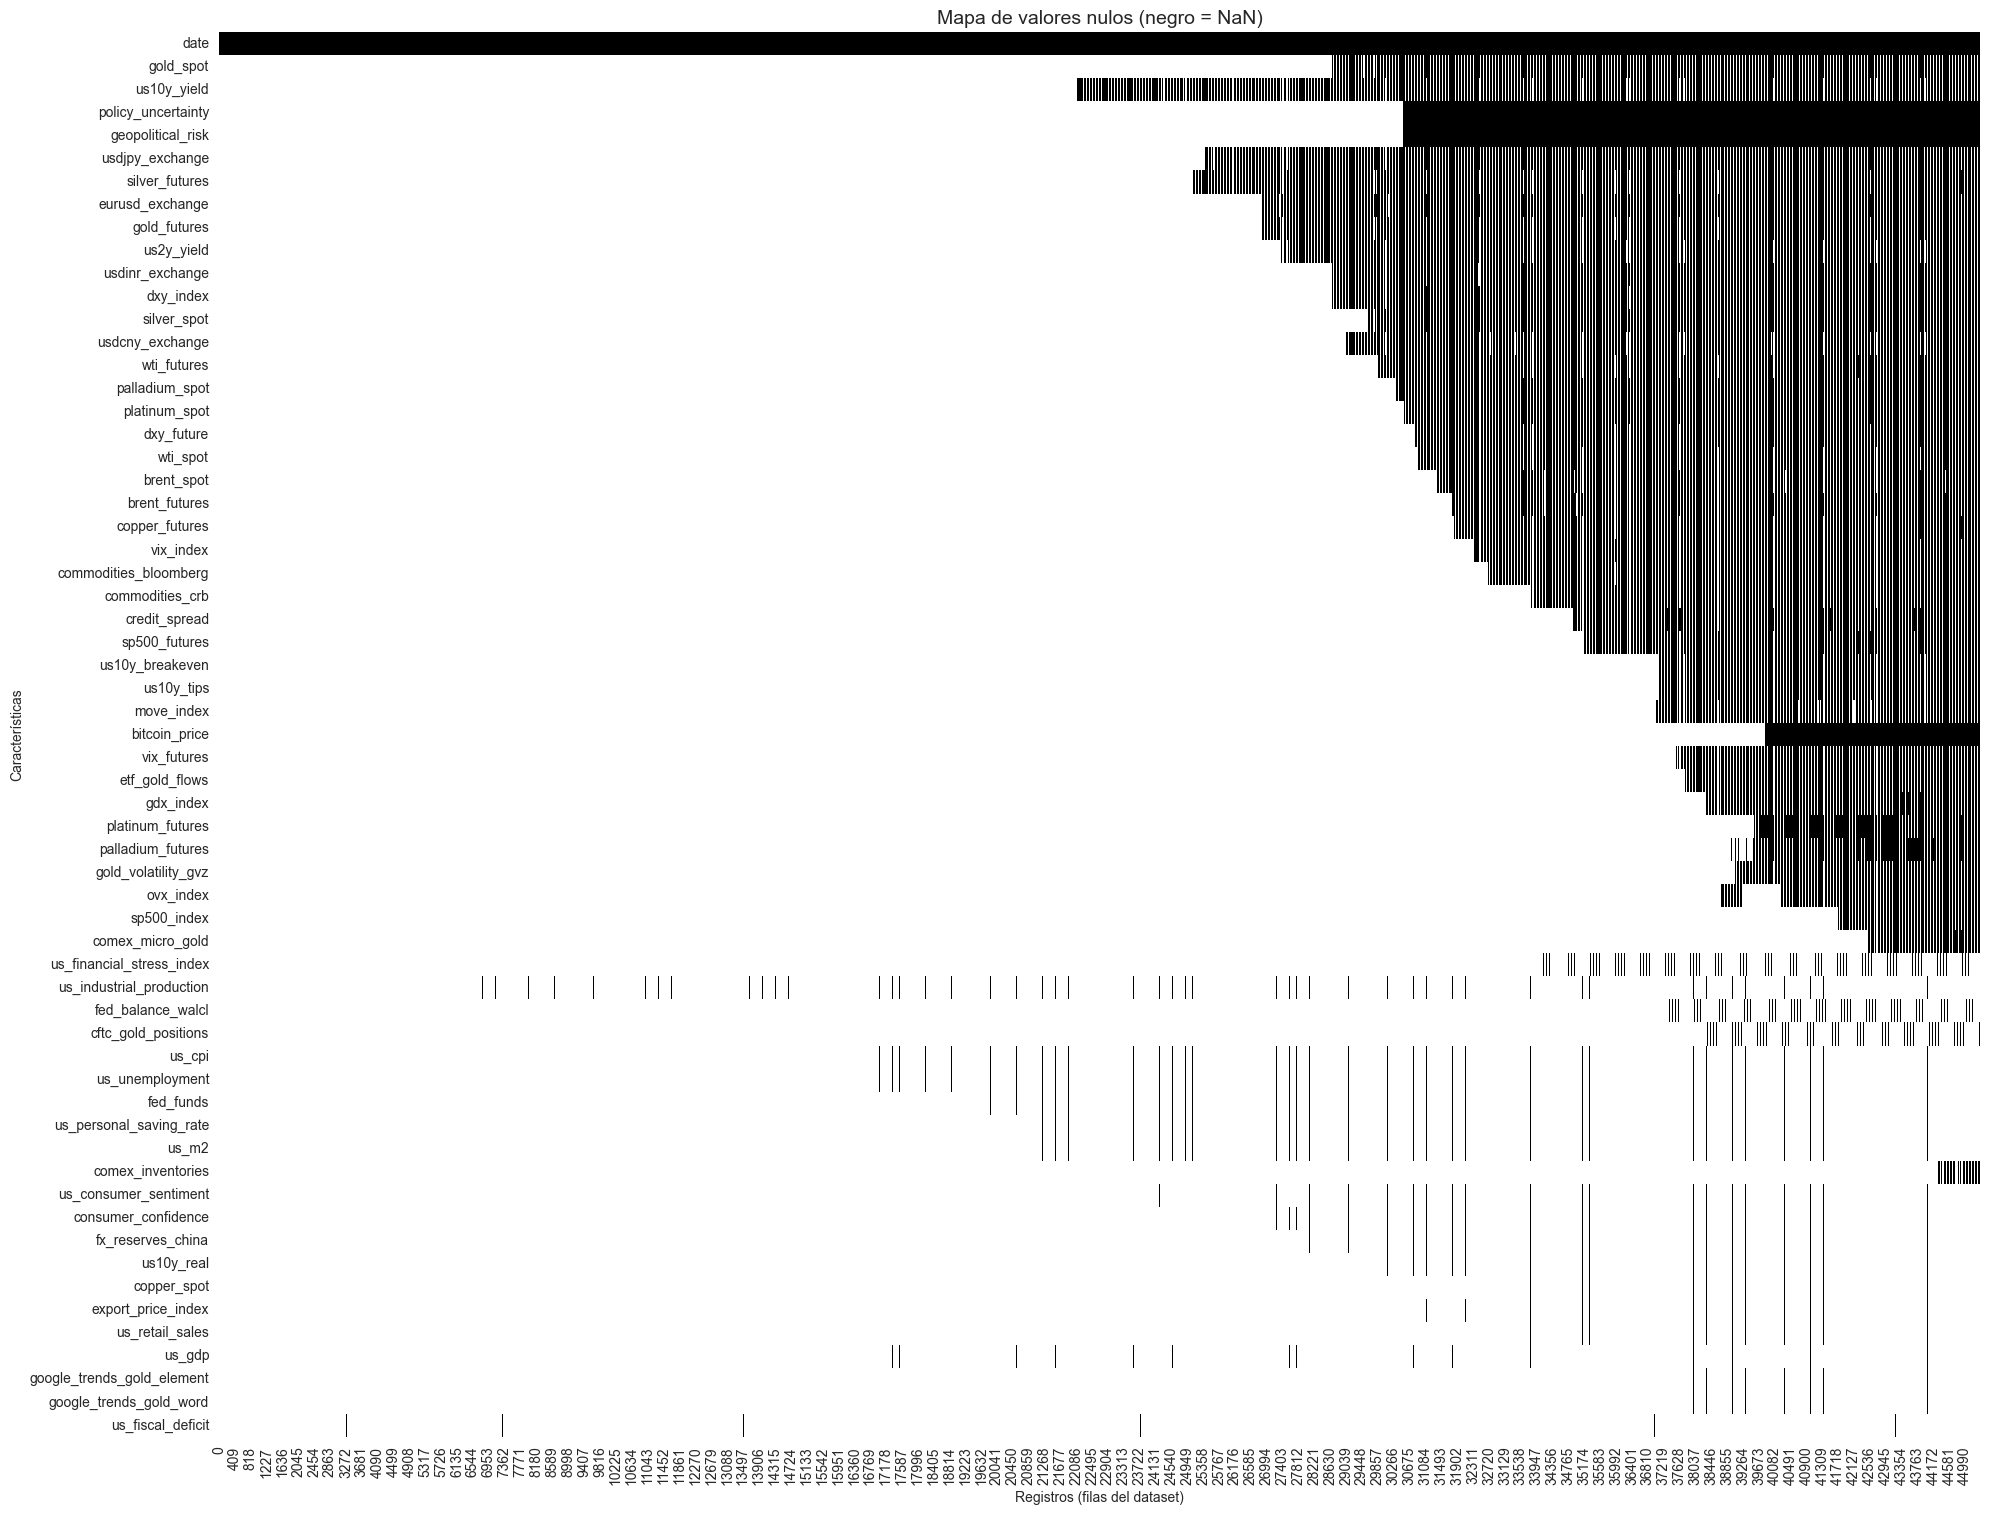

In [6]:
# -------------------------
# 2.1 Visualización directa de los valores nulos (mapa binario ancho)
# -------------------------
print("Visualizando patrón de valores nulos...")
null_mask = df.isnull().astype(int)
plt.figure(figsize=(20, max(6, len(df.columns) * 0.25)))
sns.heatmap(
    null_mask.T,
    cmap=["black", "white"],
    cbar=False
)
plt.title("Mapa de valores nulos (negro = NaN)", fontsize=14)
plt.xlabel("Registros (filas del dataset)")
plt.ylabel("Características")
plt.tight_layout()
plt.show()


## Interpretación del mapa de valores faltantes

El mapa binario confirma de manera visual lo que ya sugerían las estadísticas previas:

### 1. Gran parte del tramo inicial está completamente vacío
La sección correspondiente a los primeros años del dataset aparece **casi completamente negra**,
indicando que **prácticamente ninguna variable contiene información útil** en ese periodo.

Esto es totalmente coherente con la naturaleza del dataset:

- Muchas series financieras no existían en la primera mitad del siglo XX.
- Variables macroeconómicas modernas comienzan décadas después.
- Indicadores de riesgo (EPU, GPR), ETFs, y posiciones en futuros son muy recientes.
- Incluso metales y commodities tienen huecos extensos antes de los años 60–80.

### 2. La disponibilidad de datos mejora gradualmente con el tiempo
A medida que avanzan los años, la imagen muestra:

- un aumento progresivo de “zonas blancas” (datos disponibles),
- aunque con ritmos diferentes según la variable,
- lo cual refleja la heterogeneidad temporal del dataset.

### 3. La densidad de información se vuelve razonable recién en periodos más recientes
Solo a partir de cierto punto —más adelante determinaremos exactamente cuál— se aprecia:

- mayor uniformidad entre variables,
- reducción significativa de NaNs,
- presencia simultánea de muchas series.

### 4. Implicación inmediata
Este patrón visual refuerza la necesidad de seleccionar **un punto de inicio racional** para el análisis, evitando periodos donde:

- el target está vacío o casi vacío,
- la mayoría de features no existen,
- y cualquier cálculo estadístico resultaría inconsistente.

---

### Próximo paso
Usando esta información visual, aplicaremos un primer recorte basado en el:

**primer año en el que el target (`gold_spot`) tiene datos válidos.**

Esto nos dará un **primer START_YEAR provisional**, tras el cual continuaremos refinando el rango de estudio.


## 2.2 Selección inicial del año de inicio basado en la disponibilidad del target

Tras visualizar el patrón de valores faltantes, hemos comprobado que las primeras décadas del
dataset están prácticamente vacías para la mayoría de variables.
Antes de definir un rango temporal adecuado, debemos asegurarnos de que la **variable objetivo**
(`gold_spot`) tenga valores válidos.

El modelo no puede entrenarse ni evaluarse en periodos donde el target no exista, por lo que el
primer criterio mínimo y necesario es identificar:

> **¿En qué año aparece el primer valor válido del target?**

Una vez obtenido ese año, realizamos un recorte inicial del dataset, filtrando todas las filas
anteriores.
Este primer START_YEAR será un punto de partida provisional, que refinaremos más adelante cuando
analicemos la cobertura del resto de variables.


In [7]:
# -------------------------
# 2. Filtrar dataset desde el primer año con target disponible
# -------------------------
first_valid_year = df.loc[df[TARGET].notna(), DATE_COL].dt.year.min()
print(f"Primer año con valor válido de {TARGET}: {first_valid_year}")
START_YEAR = first_valid_year + 1 # más uno para completar lo que queda de año
df = df[df[DATE_COL].dt.year >= START_YEAR].reset_index(drop=True)
print(f"Dataset filtrado desde {START_YEAR}: {len(df)} filas")


Primer año con valor válido de gold_spot: 1979
Dataset filtrado desde 1980: 16694 filas


## Interpretación del recorte basado en el primer valor válido del target

El resultado muestra que el **primer registro disponible de `gold_spot` aparece en el año 1979**.
Dado que los meses iniciales de ese año pueden contener valores aislados o incompletos, se decide
comenzar el análisis a partir de **1980**, garantizando así un año completo en el que el target
está bien definido.

### Efecto del recorte
Al filtrar el dataset desde 1980:

- se eliminan automáticamente décadas enteras sin información útil,
- se descartan miles de filas completamente vacías,
- se mantiene únicamente el tramo temporal en el que la variable objetivo está presente,
- y se reduce el volumen de datos irrelevantes para el análisis.

### Por qué este recorte es razonable
Este paso no define aún el rango final de estudio, pero constituye un **primer filtrado necesario**:

- No tiene sentido analizar correlaciones o aplicar PCA en periodos donde el target no existe.
- El recorte evita distorsiones causadas por décadas con 100% de NaNs.
- Permite concentrar el EDA en un tramo temporal donde al menos el objetivo es observable.

Más adelante, refinaremos aún más el START_YEAR seleccionando un **punto de inicio más homogéneo**
para las demás features, especialmente aquellas que comienzan en fechas más recientes.


## 2.3 Visualización del patrón de missingness tras el recorte inicial

Después de recortar el dataset para comenzar en 1980 (primer año en el que `gold_spot` está
disponible), es necesario volver a visualizar la distribución de valores faltantes.

El objetivo de este paso es comprobar:

- si el recorte ha reducido significativamente la cantidad de NaNs,
- si las series comienzan en fechas similares,
- o si todavía hay muchas variables que siguen comenzando demasiado tarde,
- y evaluar si es necesario aplicar un recorte temporal más estricto para mejorar la cobertura.

Para ello generamos nuevamente un ** mapa binario de missingness**, pero ahora aplicado al dataset
recortado.


Visualizando patrón de valores nulos tras el recorte inicial...


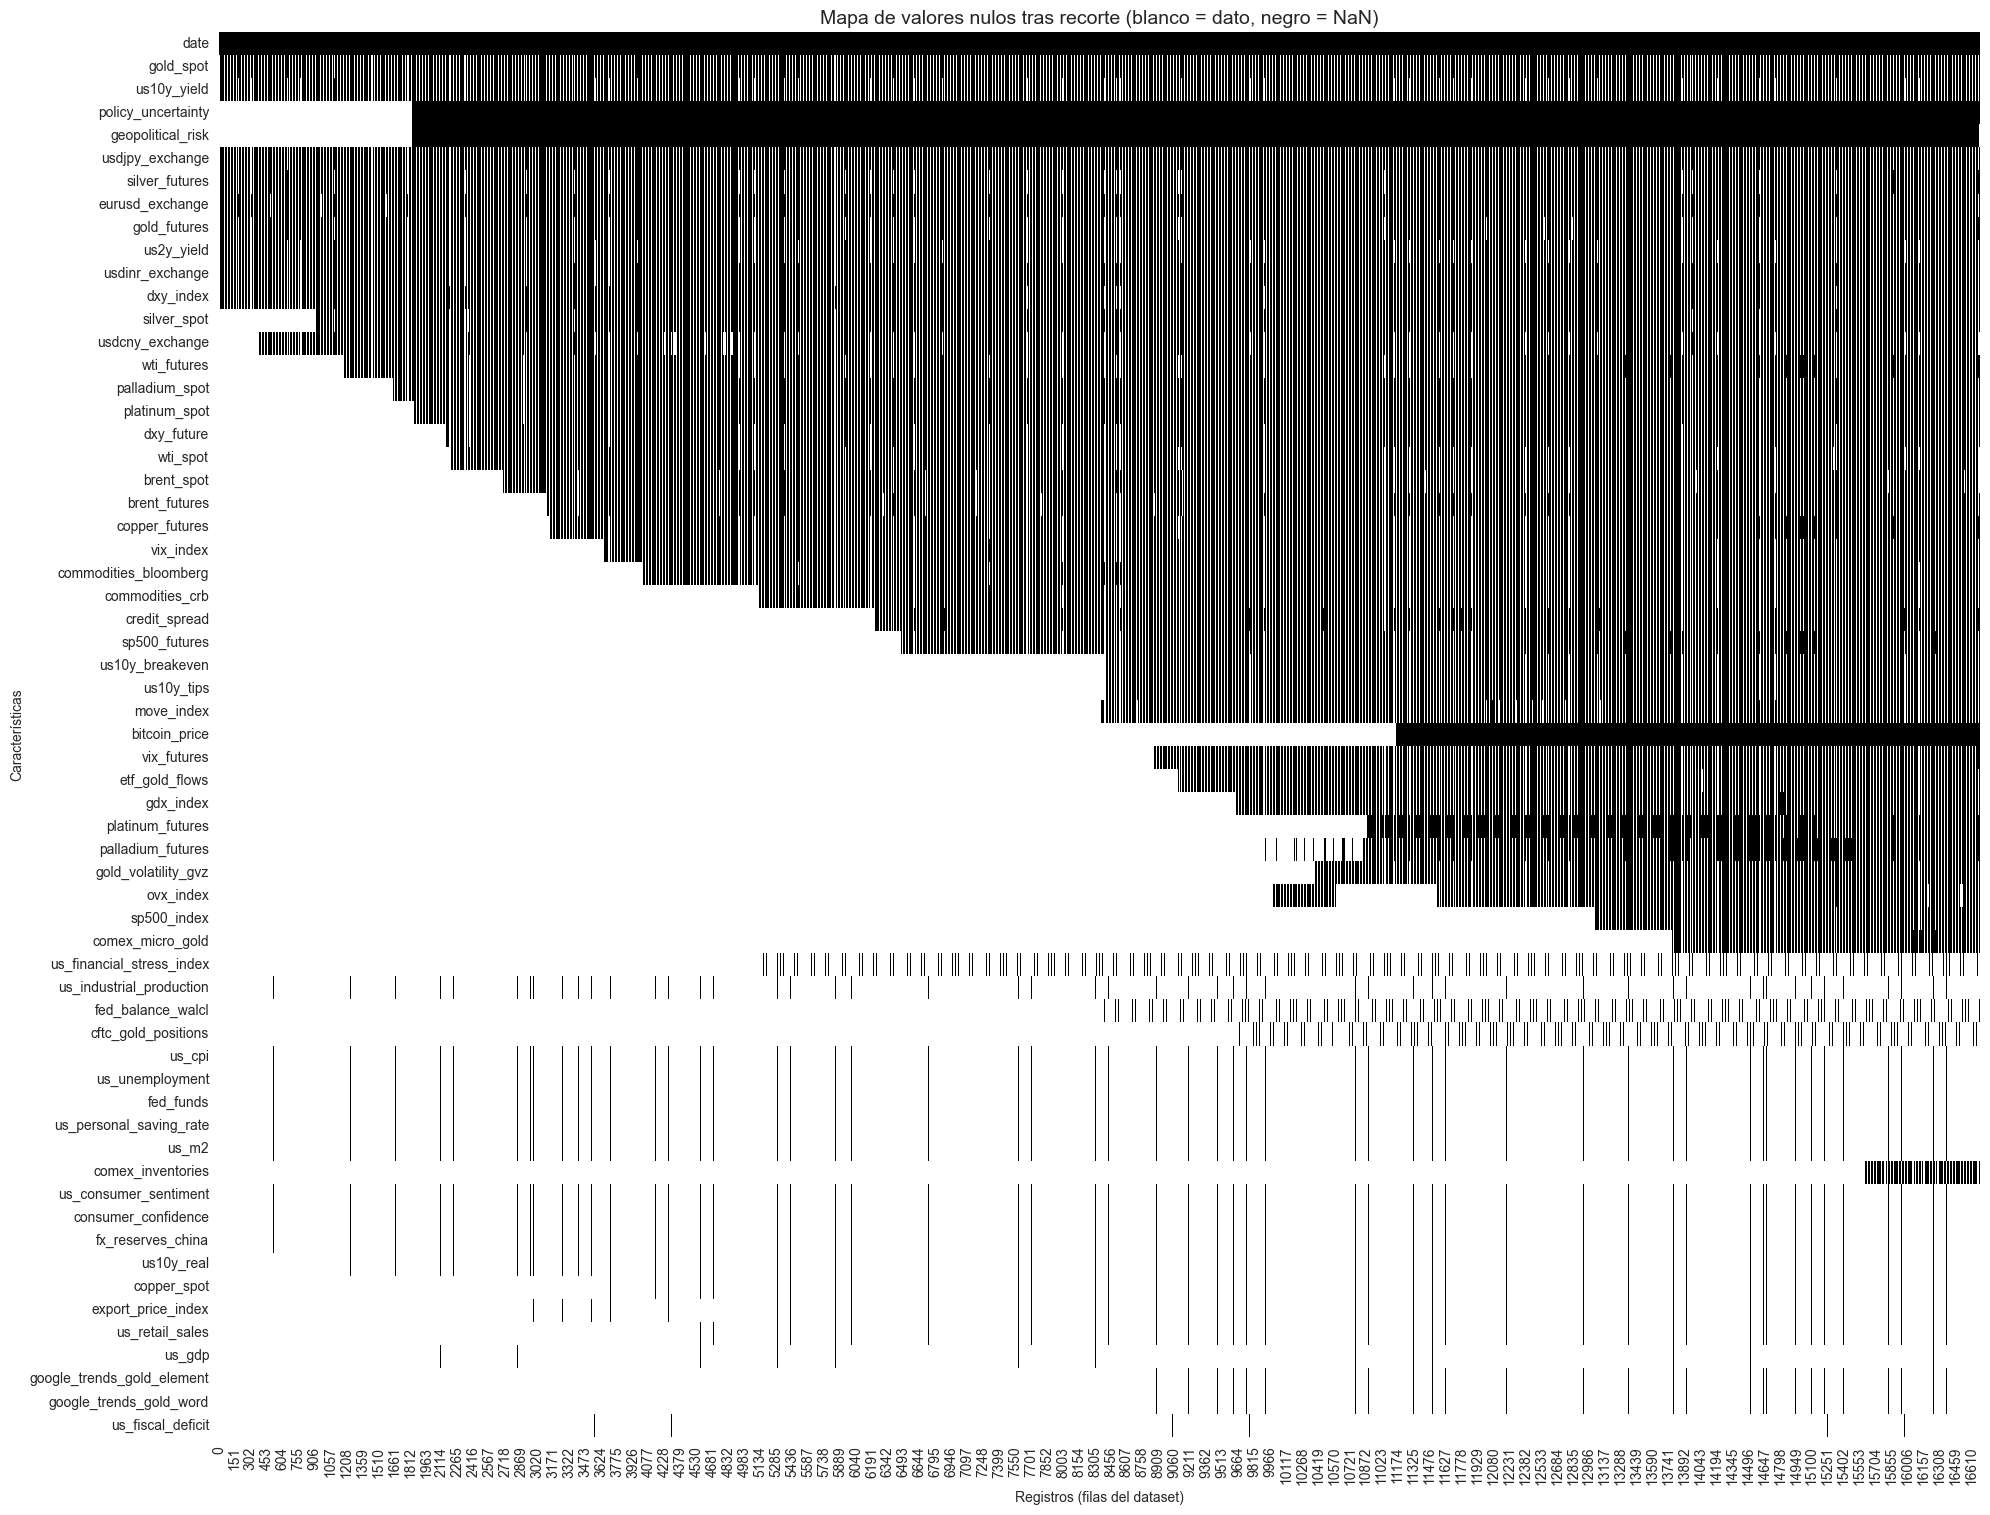

In [8]:
# -------------------------
# Visualización de missingness tras recorte inicial
# -------------------------
print("Visualizando patrón de valores nulos tras el recorte inicial...")

null_mask = df.isnull().astype(int)

plt.figure(figsize=(20, max(6, len(df.columns) * 0.25)))
sns.heatmap(
    null_mask.T,
    cmap=["black", "white"],
    cbar=False
)
plt.title("Mapa de valores nulos tras recorte (blanco = dato, negro = NaN)", fontsize=14)
plt.xlabel("Registros (filas del dataset)")
plt.ylabel("Características")
plt.tight_layout()
plt.show()


## Interpretación del mapa de valores faltantes tras el recorte inicial (1980)

La visualización del patrón de missingness después de aplicar el primer recorte temporal confirma que
la eliminación de los años anteriores a 1980 mejora parcialmente la densidad del dataset, pero aún
se observan varios efectos importantes:

---

### 1. Las series financieras diarias comienzan pronto y muestran buena disponibilidad
Las variables más directamente relacionadas con mercados líquidos —como `gold_futures`, `us10y_yield`,
`sp500_index`, `dxy_index`, `silver_spot`, `wti_spot`, `vix_index`, etc.— aparecen mayoritariamente
en blanco a partir de la década de 1980, lo que indica que disponemos de:
- registros continuos,
- frecuencia diaria estable,
- y ausencia de huecos prolongados.

Estas variables son candidatas sólidas para el análisis multivariante temprano.

---

### 2. Las series con frecuencia baja (mensual, trimestral, anual) aparecen en la parte inferior del gráfico
Tal como muestra el heatmap:
- variables mensuales (CPI, M2, Retail Sales…)
- variables trimestrales (GDP),
- y variables anuales (déficit fiscal, tasas reales de largo plazo),

aparecen representadas por patrones de puntos aislados, característicos de su frecuencia original.

Lo relevante es que **también comienzan alrededor de los años 80–90**, por lo que se alinean razonablemente bien con el target en ese tramo.

---

### 3. Persisten variables que comienzan claramente más tarde
Una parte identificable del heatmap muestra columnas que permanecen negras durante un tramo prolongado,
lo cual indica que ciertas series:
- no existían antes de los años 2000–2010,
- o comenzaron a registrarse mucho después (p. ej., Bitcoin, OVX, indicadores modernos de riesgo).

Esto confirma que aún existe una **segunda franja de ausencia estructural** que deberemos gestionar.

---

### 4. La cobertura general mejora, pero no es homogénea
Aunque la densidad global de datos tras el recorte es mucho más alta, se observa:

- heterogeneidad clara entre grupos de variables,
- diferencias notables en la fecha de inicio de cada serie,
- y solapamientos incompletos en los años 80 y 90.

Esto sugiere que el dataset todavía no está en un rango ideal para aplicar técnicas multivariantes sin un tratamiento adicional.

---

### 5. Implicación práctica: el recorte a 1980 es razonable, pero no suficiente
La visualización muestra que empezar en 1980 garantiza la disponibilidad del target y de muchas
series diarias relevantes.

Sin embargo:

- todavía hay variables que no comienzan hasta mucho más tarde,
- lo que introduce bloques de NaNs que no son imputables de manera realista,
- y afectaría análisis como correlaciones, PCA o VIF.

Por tanto, para obtener un dataset más “compacto y uniforme”, necesitaremos aplicar un **segundo recorte más estratégico** basado en una feature que actúe como punto de convergencia temporal de la mayoría de variables.

---

### Próximo paso
Dado el patrón observado, el siguiente paso lógico será:

> Identificar la primera variable que presenta registros consistentes y densos y establecer su año inicial como **nuevo START_YEAR estratégico**.

Como veremos, la variable `geopolitical_risk` resulta ser un excelente candidato para este propósito.


## 2.4 Selección de un punto de partida estratégico y visualización del target

El primer recorte a partir de 1980 garantiza que el target (`gold_spot`) está disponible.
Sin embargo, este punto de inicio no coincide necesariamente con una zona de **alta densidad de datos**
para el resto de variables.

Para mejorar la homogeneidad temporal del dataset, buscamos una feature cuyo primer registro válido
coincida con un tramo donde un mayor número de series comienzan simultáneamente. En el contexto de
este proyecto, la variable **`geopolitical_risk`** es un buen candidato, ya que:

- empieza más tarde que el target, pero no demasiado,
- coincide con el inicio de muchas series financieras relevantes,
- reduce notablemente el volumen de NaNs residuales,
- y proporciona una base temporal más coherente para análisis multivariantes (correlaciones, PCA, VIF).

Por ello, identificamos el primer año en el que `geopolitical_risk` tiene datos válidos
y utilizamos ese año como **START_YEAR estratégico provisional**.

Antes de usar definitivamente este punto, es importante visualizar el comportamiento del target
a partir de dicho año. Esto nos permitirá confirmar que:

- el target tiene una estructura temporal razonable,
- no existe un ruido excesivo al inicio del período,
- y la serie conserva suficiente historial para el análisis.

Para ello graficamos la evolución del precio del oro desde el nuevo año de inicio.


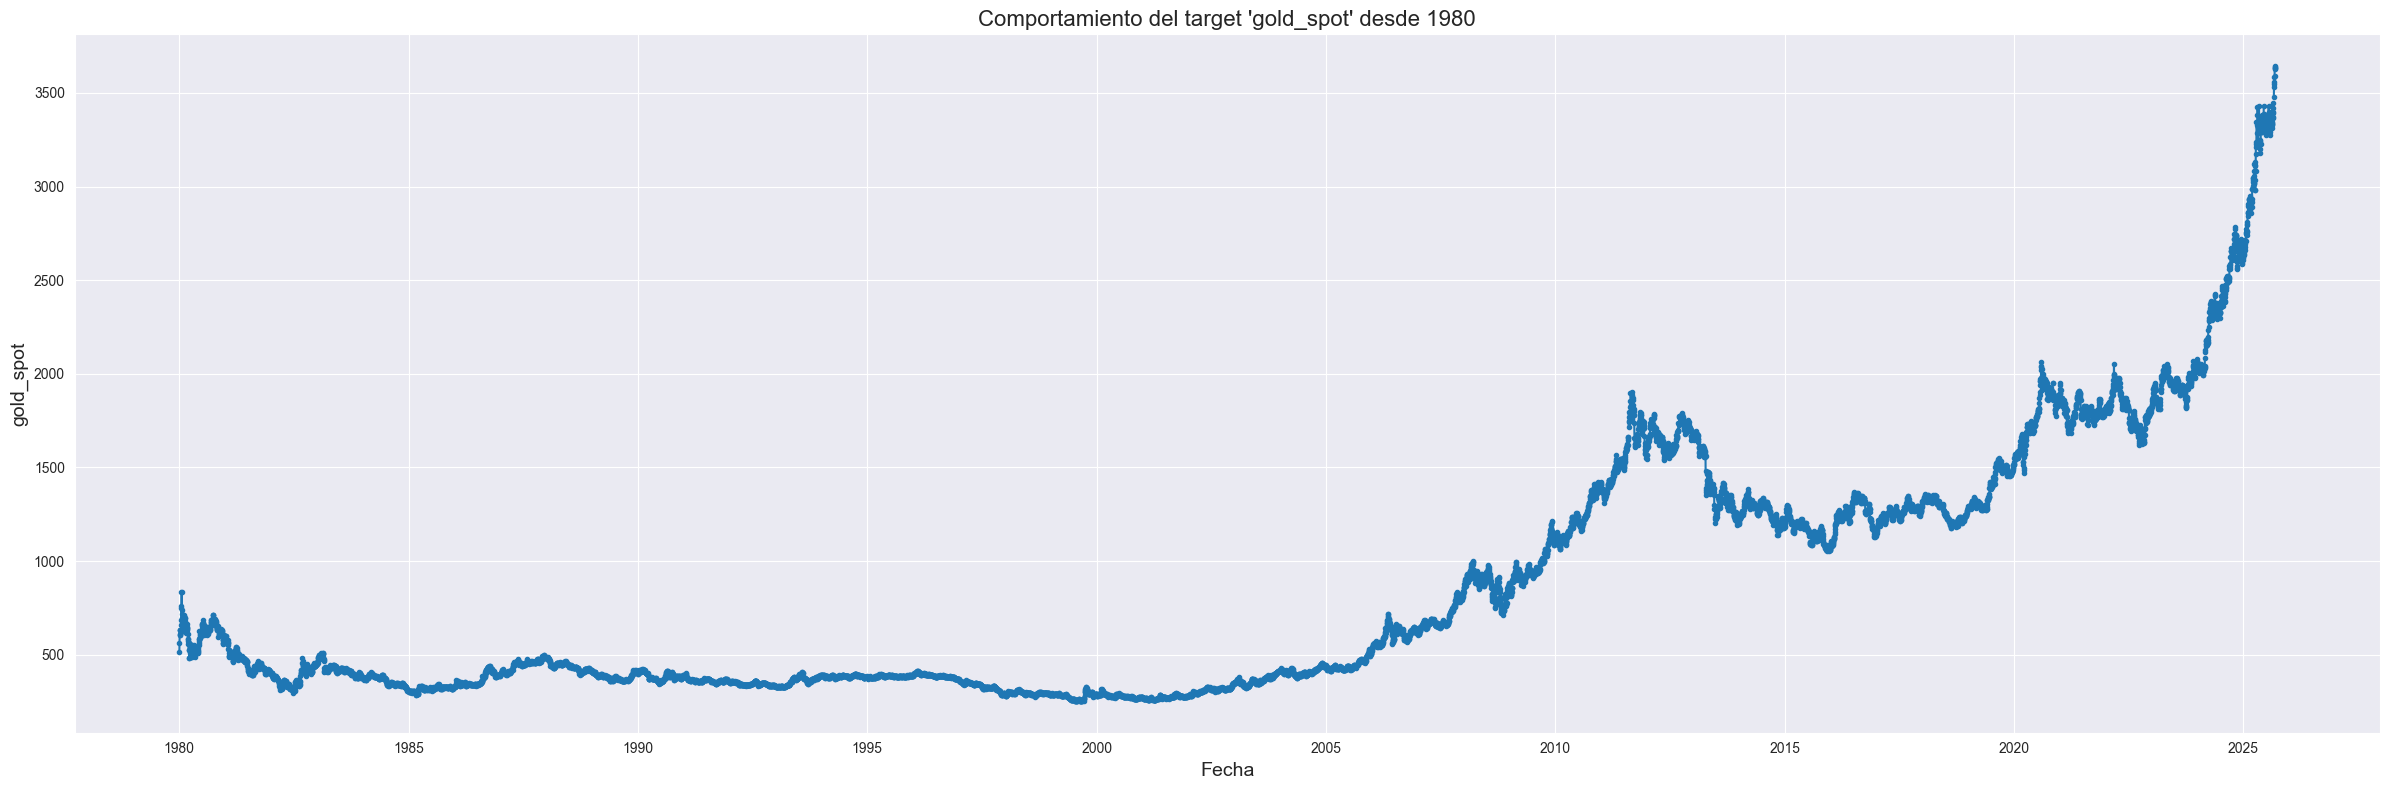

In [9]:
# -------------------------
# 2.X Visualización del target desde el primer año válido (pantalla completa)
# -------------------------
df_viz = df.copy()
plt.figure(figsize=(24, 8))
plt.plot(df_viz[DATE_COL], df_viz[TARGET], marker='o', linestyle='-', markersize=3)
plt.title(f"Comportamiento del target '{TARGET}' desde {START_YEAR}", fontsize=16)
plt.xlabel("Fecha", fontsize=14)
plt.ylabel(TARGET, fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()


In [10]:
# -------------------------
# 2.X Recorte definitivo del dataset según 'geopolitical_risk'
# -------------------------
# Primer año con valor válido en 'geopolitical_risk'
START_YEAR = df.loc[df['geopolitical_risk'].notna(), DATE_COL].dt.year.min()
print(f"Punto de partida definitivo: {START_YEAR}")

# Recortar dataset desde ese año
df = df[df[DATE_COL].dt.year >= START_YEAR].reset_index(drop=True)
print(f"Dataset filtrado desde {START_YEAR}: {len(df)} filas")


Punto de partida definitivo: 1985
Dataset filtrado desde 1985: 14867 filas


Visualizando patrón de valores nulos...


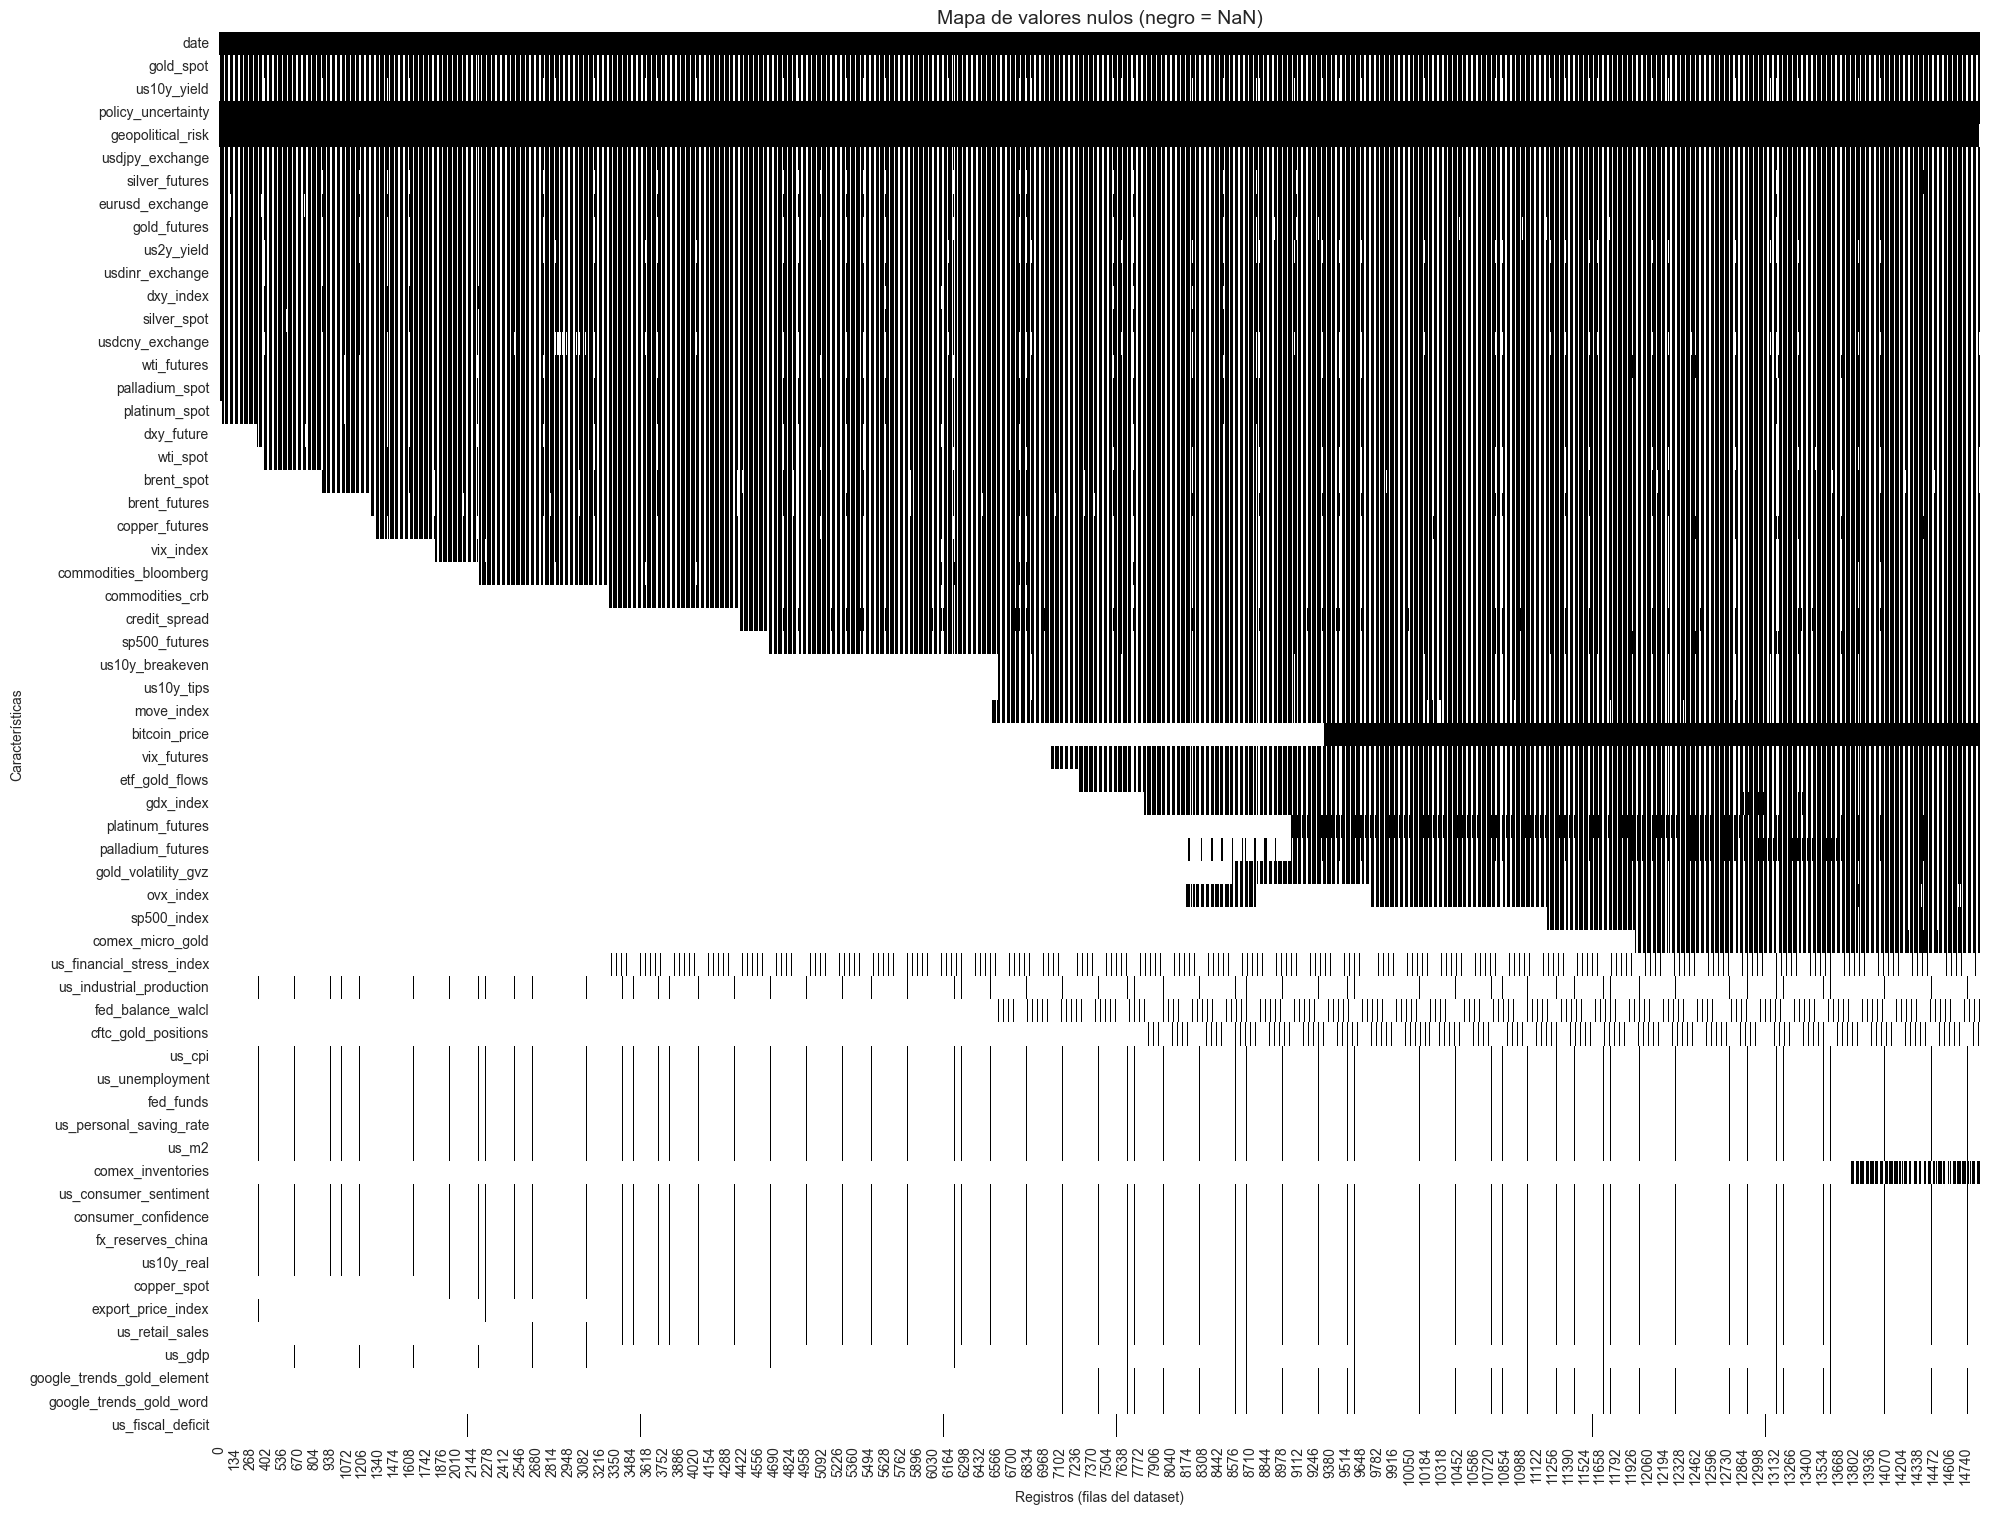

In [11]:
# -------------------------
# 2.1 Visualización directa de los valores nulos (mapa binario ancho)
# -------------------------
print("Visualizando patrón de valores nulos...")
null_mask = df.isnull().astype(int)
plt.figure(figsize=(20, max(6, len(df.columns) * 0.25)))
sns.heatmap(
    null_mask.T,
    cmap=["black", "white"],
    cbar=False
)
plt.title("Mapa de valores nulos (negro = NaN)", fontsize=14)
plt.xlabel("Registros (filas del dataset)")
plt.ylabel("Características")
plt.tight_layout()
plt.show()


## Interpretación del recorte definitivo (1985) y comportamiento del target

Después de identificar 1985 como el primer año con valores válidos en la variable `geopolitical_risk`,
recortamos el dataset a partir de esa fecha con el objetivo de obtener una base temporal más homogénea
para el análisis multivariante. El nuevo tamaño resultante (14 867 filas) confirma que se mantiene una
longitud histórica amplia.

### Comportamiento del target (`gold_spot`) desde 1985
La gráfica muestra que el precio del oro presenta un comportamiento estable y continuo desde 1985,
sin huecos ni rupturas. Algunos aspectos destacables:

- Entre 1985 y principios de los 2000, el oro mantiene una fase de consolidación prolongada con baja
volatilidad relativa.
- A partir de 2005 comienza un ciclo claramente alcista que culmina en el rally intenso de 2011.
- Tras una corrección entre 2013 y 2018, vuelve a mostrar una fase de fortalecimiento continuo hasta
alcanzar nuevos máximos históricos a partir de 2020.
- No se observan anomalías, oscilaciones espurias ni comportamientos ruidosos que desaconsejen
trabajar con este tramo temporal.

En conjunto, el target se comporta de manera sólida y consistente, por lo que **1985 es un punto de
inicio adecuado también desde el punto de vista del oro**.

---

### Patrón de missingness tras el recorte a 1985
El heatmap actualizado muestra un escenario mucho más equilibrado que el observado previamente:

#### **1. Variables diarias con excelente cobertura**
Series como:
- `gold_futures`, `silver_futures`, `wti_futures`,
- `us10y_yield`, `us2y_yield`,
- `dxy_index`, `eurusd_exchange`,
- índices como `vix_index`, `sp500_index`, `commodities_bloomberg`,

aparecen casi completamente en blanco desde 1985, indicando datos continuos y de alta calidad.

#### **2. Variables de frecuencia baja visibles en la parte inferior**
Los indicadores mensuales, trimestrales y anuales muestran patrones de puntos aislados característicos
de su naturaleza (por ejemplo, `cpi`, `m2`, `retail_sales`, `us_gdp`, `us_fiscal_deficit`).
Esto es normal y no representa un problema para el análisis, ya que mantienen coherencia temporal a
partir de estas fechas.

#### **3. Aún existen variables que comienzan más tarde**
Algunas series modernas aparecen con franjas negras prolongadas incluso tras el recorte:

- `bitcoin_price`,
- `ovx_index`,
- ciertos futuros y ETFs,
- algunos indicadores de volatilidad o estrés financiero.

Estas variables son estructuralmente recientes y no afectan negativamente al tramo de datos restantes;
sencillamente entrarán al EDA con menos longitud histórica.

#### **4. Equilibrio logrado con el recorte**
El recorte a 1985 consigue:
- reducir drásticamente el número de NaNs,
- mejorar la densidad informativa,
- sincronizar muchas series principales,
- y mantener un historial suficientemente largo para el modelado.

Aunque se podrían evaluar recortes alternativos (1990 o 2000) para compararlos, **1985 ofrece una
relación óptima entre longitud histórica y densidad de datos**.

---

### Conclusión
La visualización conjunta de:
- el target (`gold_spot`) desde 1985, y
- el nuevo mapa de missingness

confirma que **1985 es un inicio temporal robusto y bien justificado**, tanto desde la perspectiva del
activo objetivo como desde la disponibilidad y coherencia de las variables exógenas.

En adelante, este será el punto de partida para el resto del análisis exploratorio (correlaciones,
PCA, VIF, modelos preliminares, etc.).


## 2.5 Zoom temporal: análisis detallado de missingness por ventanas de tiempo

Después de fijar 1985 como punto de inicio estratégico, es útil examinar con mayor detalle el patrón
de disponibilidad de datos durante periodos concretos.

Este análisis con ventanas temporales cumple dos objetivos:

1. **Verificar la idoneidad del año de inicio (1985)**
   Observando los primeros 10 años tras el recorte (1985–1995), podemos evaluar si las series
   comienzan efectivamente en esta franja o si aún existen huecos importantes.

2. **Comparar con un periodo reciente (2015–2025)**
   Esto permite visualizar la evolución de la densidad del dataset con el paso del tiempo,
   confirmando que las series modernas tienen registros sólidos en fechas recientes.

Al contrastar estos dos rangos temporales —uno antiguo y uno actual— obtenemos una visión más clara
de:

- qué grupos de variables son históricos y cuales son modernos,
- cómo cambia la disponibilidad según la frecuencia (diaria, mensual, anual),
- y hasta qué punto el recorte a 1985 es razonable y consistente.


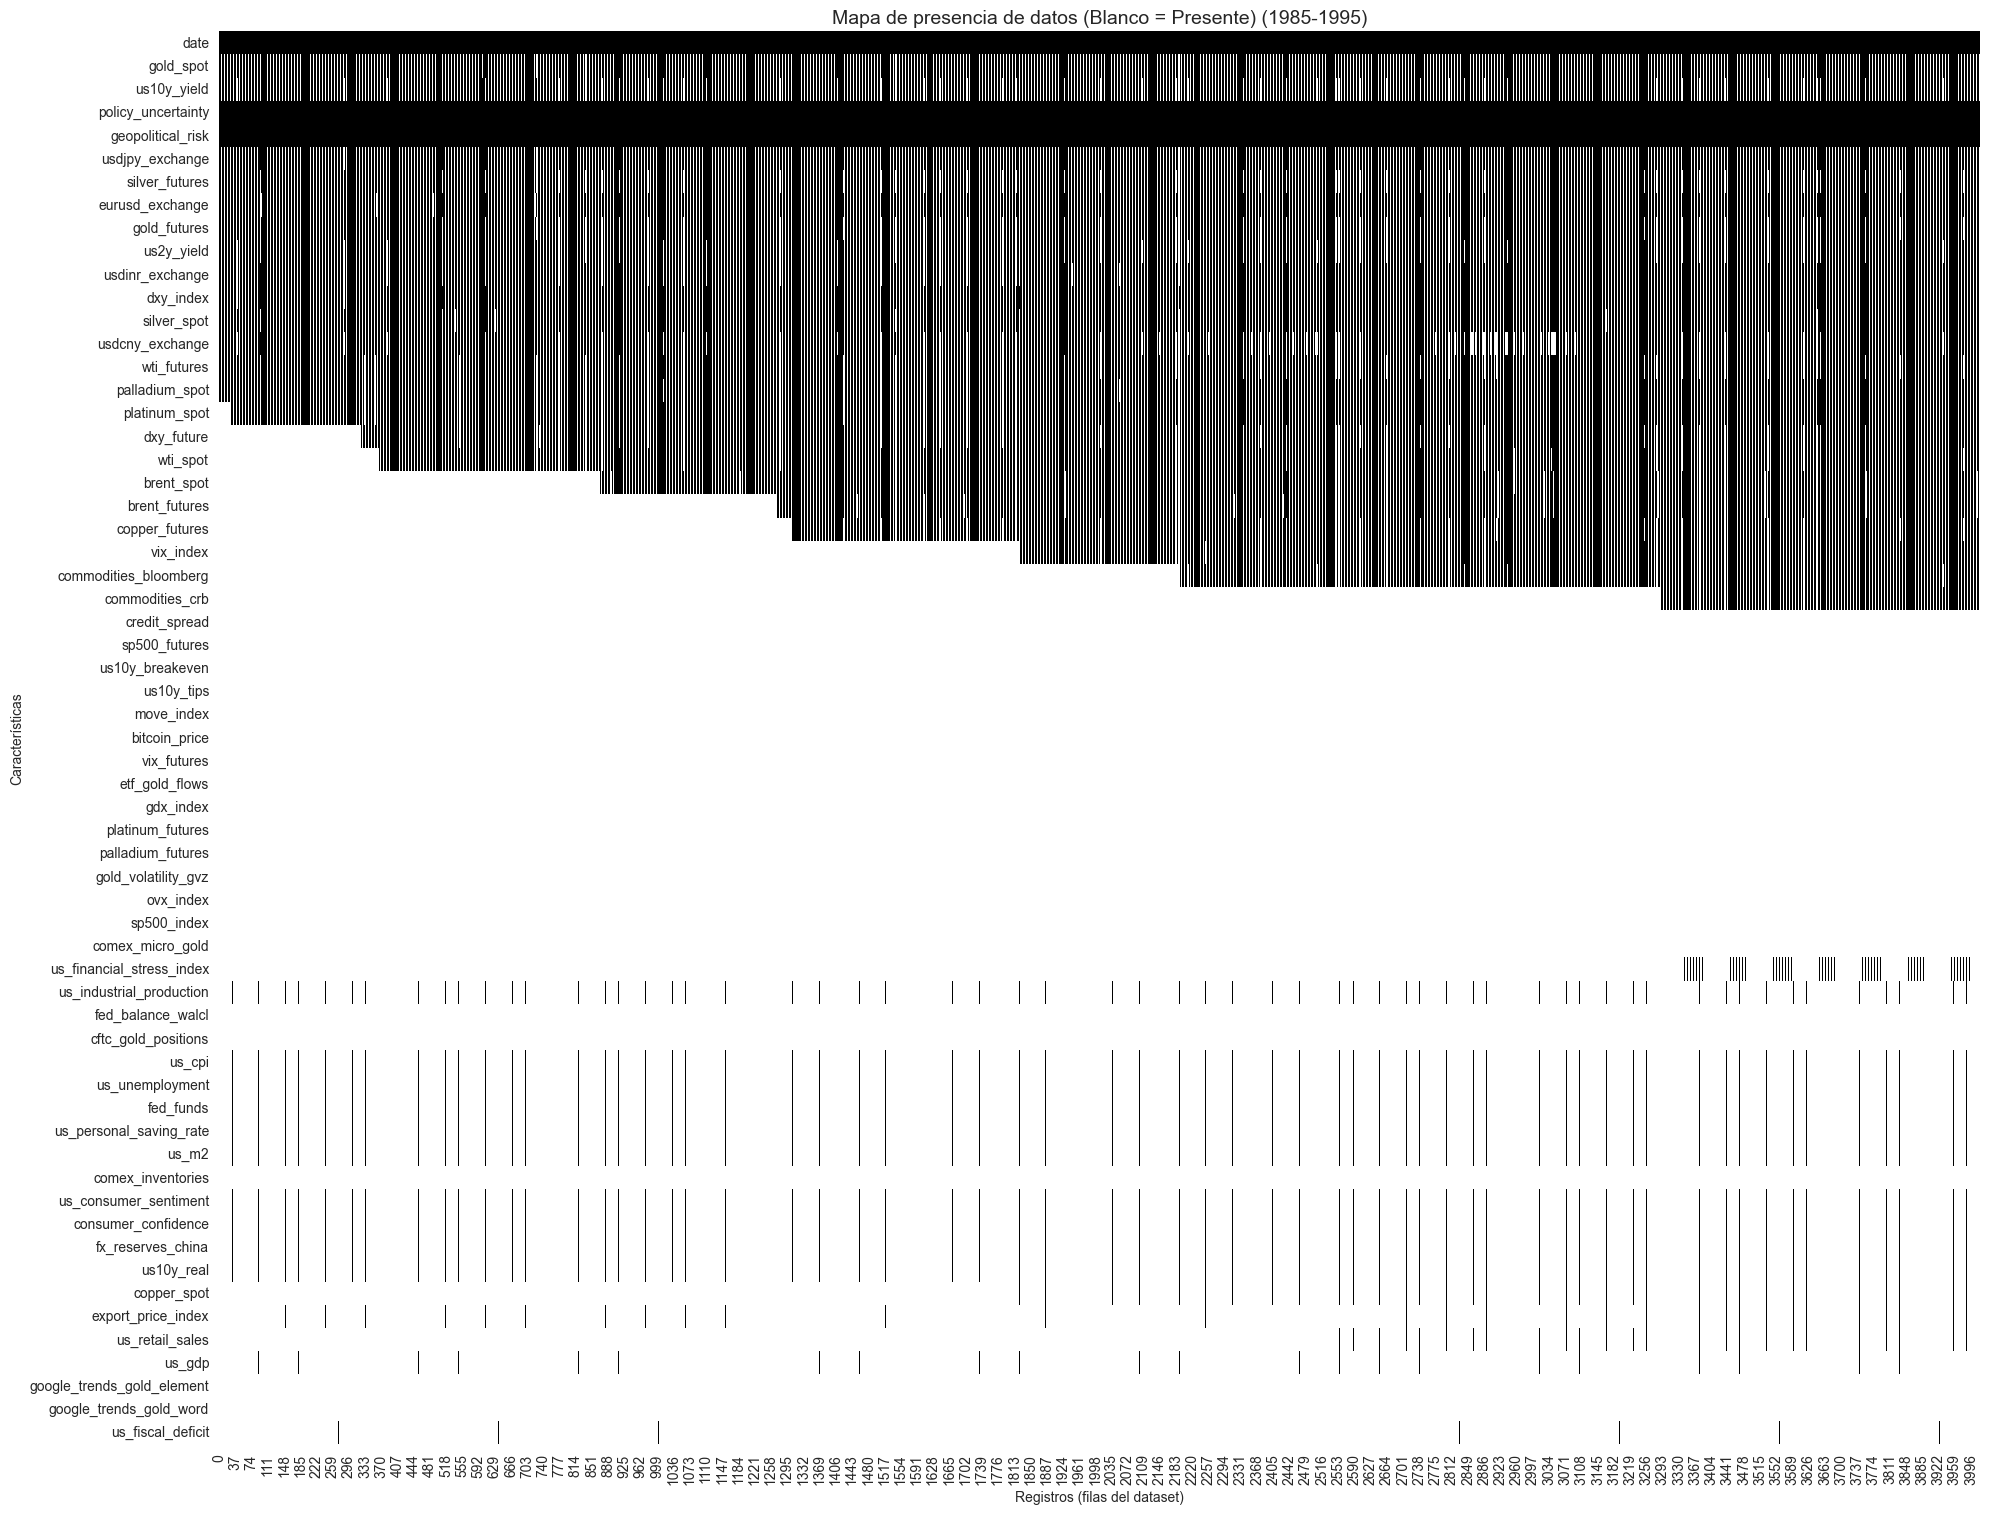

In [12]:
df_viz = df.copy()
zoom_start_year = START_YEAR
zoom_end_year   = START_YEAR + 10

df_viz = df_viz[(df_viz[DATE_COL].dt.year >= zoom_start_year) &
                (df_viz[DATE_COL].dt.year <= zoom_end_year)]

null_mask = df_viz.isnull().astype(int)
plt.figure(figsize=(20, max(6, len(df_viz.columns) * 0.25)))
sns.heatmap(
    null_mask.T,
    cmap=["black", "white"],
    cbar=False
)
plt.title(f"Mapa de presencia de datos (Blanco = Presente) ({zoom_start_year}-{zoom_end_year})", fontsize=14)
plt.xlabel("Registros (filas del dataset)")
plt.ylabel("Características")
plt.tight_layout()
plt.show()

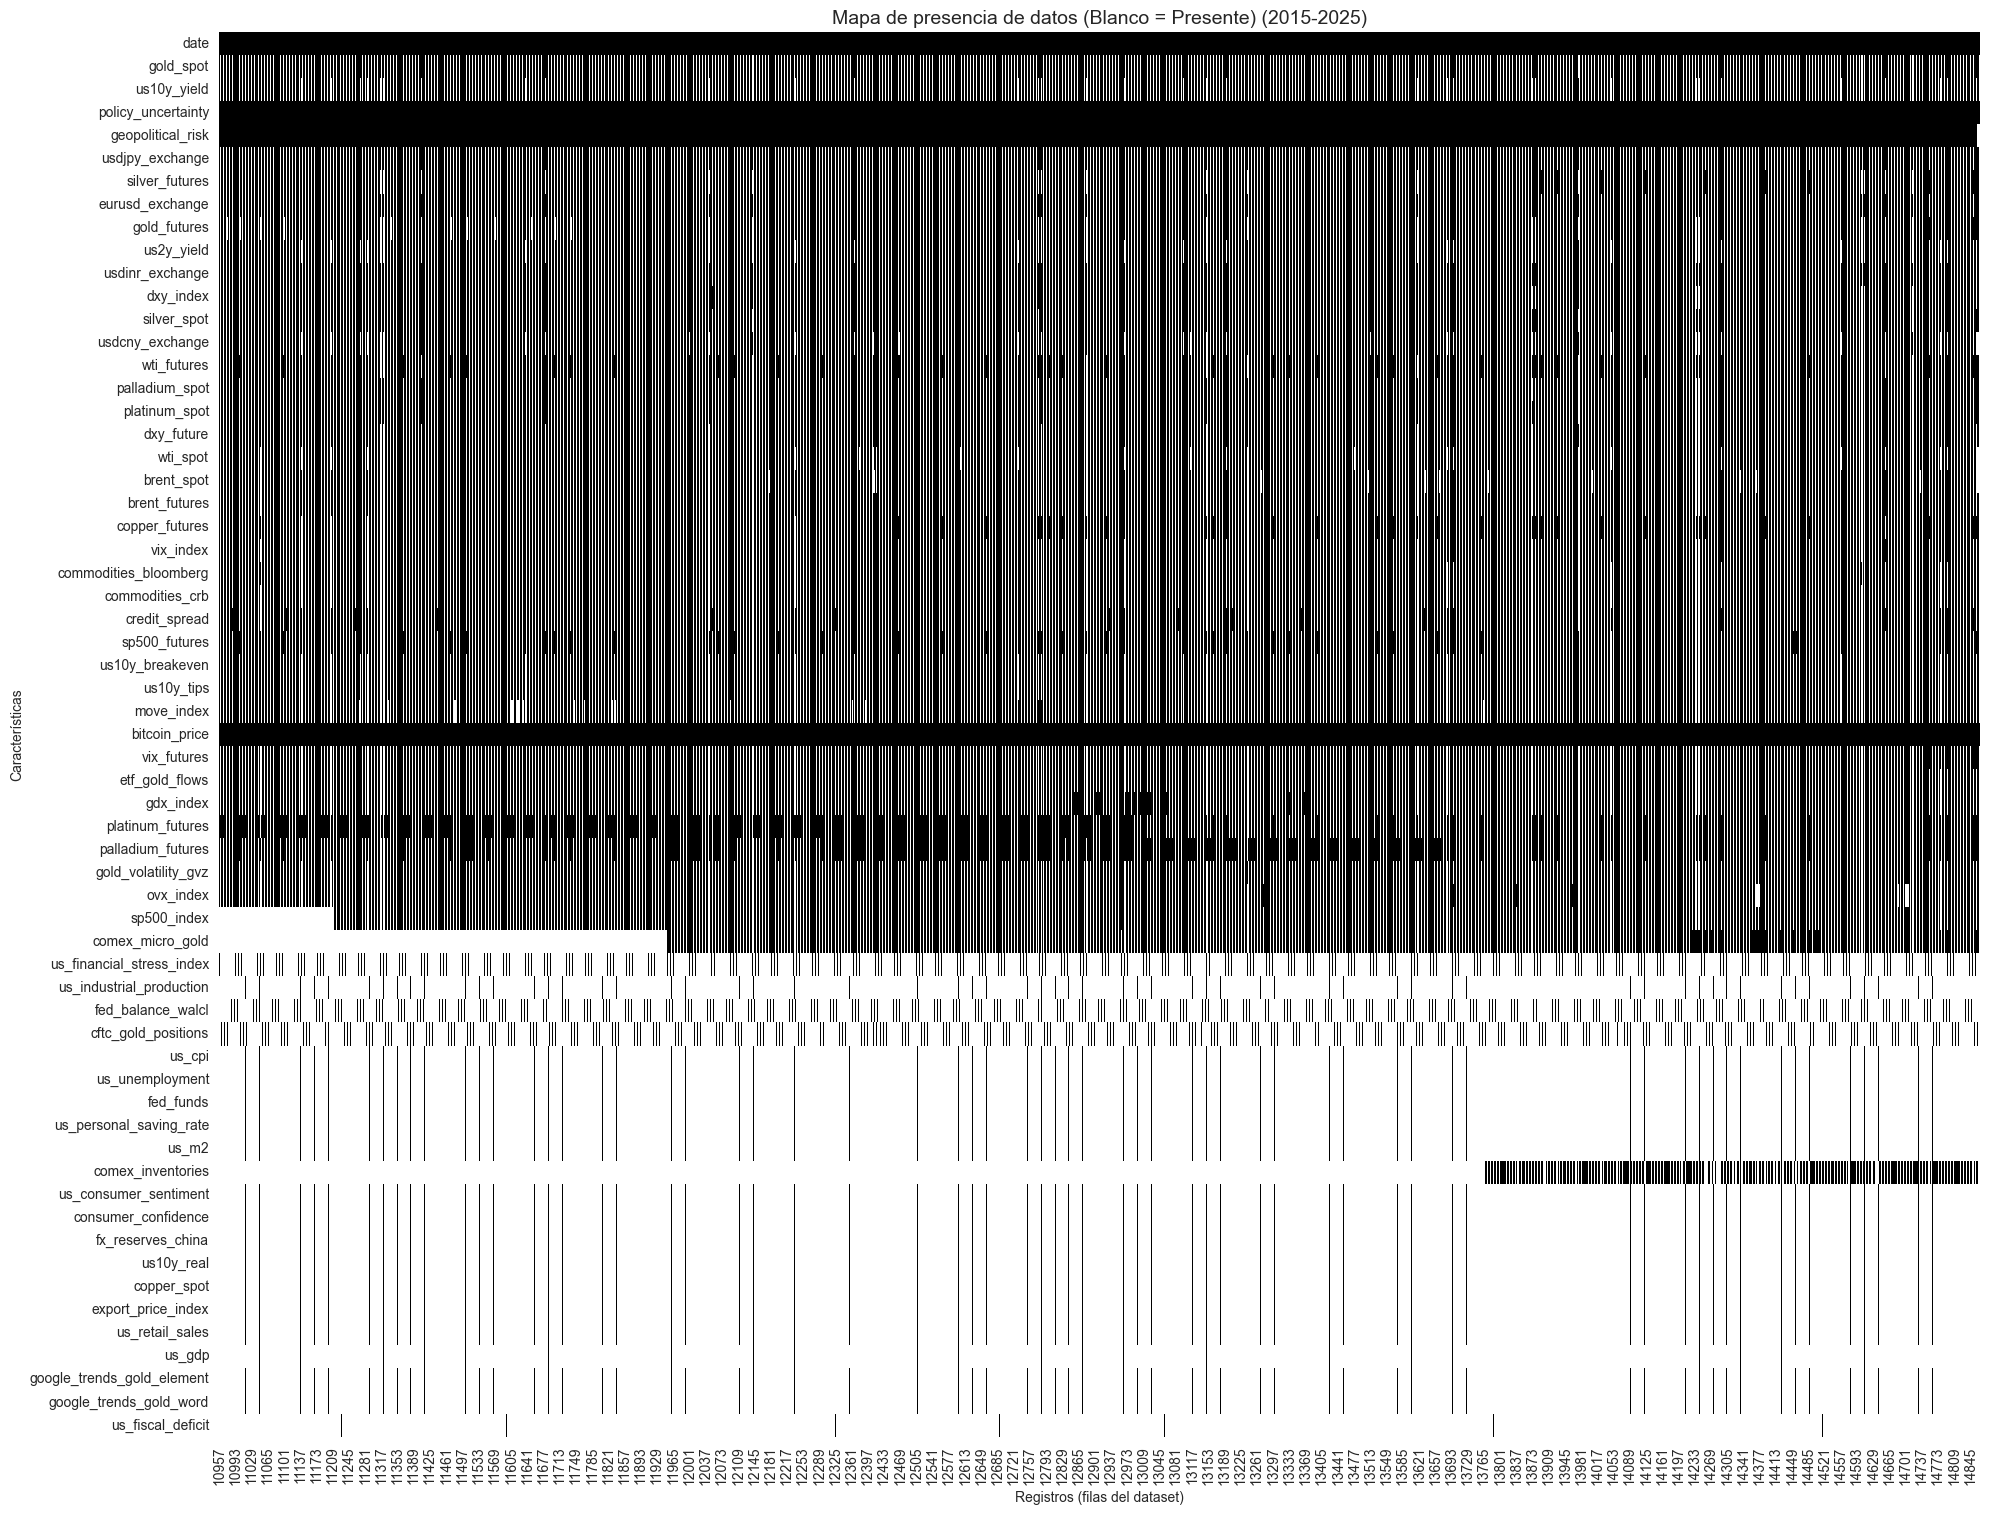

In [13]:
df_viz = df.copy()
zoom_start_year = 2015
zoom_end_year   = 2025

df_viz = df_viz[(df_viz[DATE_COL].dt.year >= zoom_start_year) &
                (df_viz[DATE_COL].dt.year <= zoom_end_year)]

null_mask = df_viz.isnull().astype(int)
plt.figure(figsize=(20, max(6, len(df_viz.columns) * 0.25)))
sns.heatmap(
    null_mask.T,
    cmap=["black", "white"],
    cbar=False
)
plt.title(f"Mapa de presencia de datos (Blanco = Presente) ({zoom_start_year}-{zoom_end_year})", fontsize=14)
plt.xlabel("Registros (filas del dataset)")
plt.ylabel("Características")
plt.tight_layout()
plt.show()

## Interpretación del zoom temporal de missingness

A continuación se analizan de forma separada los dos heatmaps generados:
(1985–1995) y (2015–2025).

---

### 1. Ventana 1985–1995: primeros 10 años del periodo elegido

En este tramo se observan varios comportamientos importantes:

#### Alta disponibilidad en las series diarias financieras
Variables como:
- `gold_futures`, `silver_futures`,
- `us10y_yield`, `us2y_yield`,
- `dxy_index`, `eurusd_exchange`,
- `wti_futures`, `vix_index`,

aparecen como **franjas completamente blancas**, indicando:
- continuidad temporal,
- frecuencia diaria sin interrupciones,
- y calidad estructural desde 1985.

Esto confirma que 1985 ya está dentro de una zona bien documentada para la mayoría de mercados
financieros.

#### Variables que comienzan justo antes o poco después de 1985
Se observa que varios indicadores —especialmente commodities y futuros secundarios— arrancan dentro
del rango 1985–1990, lo que significa que el recorte elegido **captura el inicio real** de esas series.

#### Series de baja frecuencia con patrones claros
Las variables mensuales, trimestrales y anuales exhiben la expected “separación vertical” entre puntos, lo cual es normal.

Importante:
- estas series ya tienen registros en este periodo,
- no presentan huecos de décadas como antes del recorte.

Esto refuerza que la ventana es válida también para las variables macroeconómicas.

#### Algunas series modernas aún no han comenzado
Variables como:
- Bitcoin,
- ciertos índices de volatilidad (OVX),
- algunos ETFs o futuros muy recientes,

no existen todavía en esta ventana. Esto es totalmente normal y coherente con el tiempo en que se
crearon estos activos.

---

### 2. Ventana 2015–2025: comportamiento reciente

El heatmap correspondiente a la última década muestra un patrón muy diferente:

#### Casi todas las variables están completas
La gran mayoría de filas aparecen en blanco, indicando que en esta etapa:

- los datos son mucho más densos,
- casi no hay valores faltantes,
- y todas las series modernas están completamente activas.

En otras palabras, **la parte reciente del dataset es la más rica y uniforme**.

#### Series de baja frecuencia siguen su patrón regular
En la parte inferior (CPI, M2, Retail Sales, GDP…):
- aparecen puntos aislados,
- correspondientes a sus respectivas frecuencias mensuales/trimestrales/anuales.

Este comportamiento es perfectamente esperado.

#### Las variables modernas están completamente presentes
Bitcoin, ETFs, volatilidad implícita, índices derivados…
todas estas series aparecen en blanco, indicando disponibilidad total en este tramo reciente.

---

### Conclusión del zoom temporal

El análisis de estas dos ventanas temporales confirma tres ideas clave:

1. **El recorte a 1985 es adecuado**:
   En esa fecha ya existe un núcleo sólido de variables diarias y macroeconómicas,
   sin las enormes lagunas temporales que dominaban el rango 1900–1980.

2. **Las variables modernas no distorsionan el análisis**:
   Aunque comienzan mucho más tarde, su comportamiento reciente es completo y consistente.

3. **La calidad del dataset mejora con el tiempo**:
   A partir de 2010–2015 la disponibilidad es casi total, lo que anticipa que los modelos modernos
   podrían tener mejor rendimiento en rangos más recientes.

Este análisis visual refuerza que trabajar desde 1985 es un punto de partida razonable y justificado
para el resto del EDA.


## 3) Imputación temporal exploratoria y normalización del dataset

Para continuar con el análisis exploratorio (EDA) necesitamos un dataset **completo**, sin valores
faltantes, ya que técnicas como:

- correlaciones multivariantes,
- PCA (Análisis de Componentes Principales),
- VIF (Variance Inflation Factor),
- métricas basadas en modelos,
- y análisis de estabilidad temporal,

requieren que no existan `NaN` en ninguna columna.

El principal desafío es que las series originales provienen de **fuentes heterogéneas** con
frecuencias distintas (diaria, mensual, trimestral, anual) y, además, **comienzan en años diferentes**.
Para mitigar esta disparidad y construir una versión usable del dataset, aplicamos una imputación
temporal simple basada en dos pasos:

1. **Forward Fill (`ffill`)**
   Propaga hacia adelante el último valor conocido.
   Es adecuado para datos macroeconómicos y financieros donde muchas variables se mantienen constantes
   entre fechas de publicación (CPI, PIB, M2, unemployment…).

2. **Backward Fill (`bfill`)**
   Se utiliza solo para rellenar los primeros registros, antes del primer valor disponible.
   Afecta principalmente a variables de baja frecuencia y su impacto en la dinámica temporal es muy
   limitado.

El uso conjunto de `ffill` + `bfill` es **válido y seguro en la fase exploratoria** porque:

- las imputaciones por `bfill` ocurren **solo al inicio del periodo** (tras el recorte en 1985),
- los indicadores afectados son de **frecuencia baja** y varían lentamente,
- esta imputación **no se usará para modelar**, únicamente para análisis descriptivos,
- permite evitar la eliminación masiva de filas y conservar la estructura multivariada del dataset.

Finalmente, como las técnicas multivariantes son sensibles a las escalas, aplicamos un
**StandardScaler**, obteniendo un conjunto de variables con media 0 y varianza 1.

La versión resultante es el `dataset_imputado_escalado_simple.csv`, usado exclusivamente para EDA.


In [14]:
# -------------------------
# 3) Imputación temporal y normalización exploratoria
# -------------------------

print("Imputando valores faltantes...")

y = df[TARGET].copy()
X = df.drop(columns=[DATE_COL, TARGET]).copy()

# Imputación temporal exploratoria
X = X.ffill().bfill()
y = y.ffill().bfill()

# Normalización
scaler = StandardScaler()
X_scaled = pd.DataFrame(
    scaler.fit_transform(X),
    columns=X.columns,
    index=X.index
)

# Construcción del dataset exploratorio final
df_exploratory = pd.concat([df[DATE_COL], y.rename(TARGET), X_scaled], axis=1)

# Guardado
output_path = "dataset_imputado_escalado_simple.csv"
df_exploratory.to_csv(output_path, index=False)

print(f"Dataset exploratorio guardado en: {output_path}")


Imputando valores faltantes...
Dataset exploratorio guardado en: dataset_imputado_escalado_simple.csv


## Interpretación de la imputación temporal y creación del dataset exploratorio

La aplicación de `ffill` seguida de `bfill` permite obtener un dataset completamente observado sin
eliminar filas y sin recurrir a modelos más complejos que podrían sesgar el análisis. Los efectos
principales observados son los siguientes:

---

### 1. El forward-fill funciona de manera natural en series financieras y macroeconómicas
Muchos indicadores económicos se publican una vez al mes o una vez al trimestre, permaneciendo
constantes hasta la siguiente actualización. Por ello:

- `ffill` no introduce información futura,
- mantiene el valor más reciente conocido,
- y respeta el comportamiento típico de las series de baja frecuencia.

Es una práctica estándar en EDA de finanzas y macro.

---

### 2. El backward-fill afecta solo a los primeros registros
El `bfill` solo entra en juego cuando una variable comienza después de 1985.
Se limita a rellenar los primeros valores vacíos utilizando el primer dato disponible de esa serie.

Esto es justificable porque:

1. La imputación ocurre **solo en los primeros días** del periodo analizado.
2. Afecta a variables de **baja frecuencia**, donde los saltos entre observaciones son grandes.
3. No se utilizará para entrenar modelos, solo para:
   - calcula PCA,
   - correlaciones,
   - VIF,
   - métricas estadísticas que requieren un dataset completo.

Por tanto, **no existe riesgo de data leakage en el workflow de modelado**, ya que este dataset es
exclusivamente exploratorio.

---

### 3. Estandarización mediante StandardScaler
El escalado elimina las diferencias de magnitud entre variables, permitiendo que:

- PCA no se sesgue hacia las variables de mayor varianza,
- correlaciones no queden dominadas por efectos de escala,
- y VIF identifique multicolinealidad de forma correcta.

---

### 4. Archivo final exploratorio
El fichero generado:
dataset_imputado_escalado_simple.csv
- fecha (`date`)
- target (`gold_spot`)
- todas las features escaladas y sin valores faltantes

y será usado exclusivamente para los análisis exploratorios posteriores.

---

### Advertencia importante
Este dataset **NO puede emplearse en entrenamiento o validación de modelos**, ya que contiene
imputaciones no causales (especialmente por `bfill`).
Para el modelado se utilizará un pipeline que:

- impute solo con datos pasados,
- evite cualquier fuga temporal,
- y respete el orden crono-causal completo.

---

### Conclusión
La imputación ffill + bfill, aplicada después del recorte temporal a 1985, permite construir una
versión completa y normalizada del dataset multivariado, adecuada para el EDA y para técnicas
analíticas que requieren matrices sin valores faltantes.

A continuación podremos aplicar:

- correlaciones,
- PCA,
- VIF,
- análisis de importancia,
- y diagnósticos temporales

con total estabilidad numérica.



## 4) PCA Exploratorio: reducción de dimensionalidad y análisis de varianza

Tras imputar y escalar el dataset exploratorio, el siguiente paso del EDA es aplicar un
**Análisis de Componentes Principales (PCA)**.

El PCA permite:

- identificar direcciones de máxima varianza en los datos,
- medir cuánta información se puede explicar con pocas combinaciones lineales,
- detectar redundancia entre variables,
- evaluar si existen grupos naturales de features que aportan información similar,
- y generar un primer indicador de relevancia global basado en la contribución de cada feature a los
  componentes principales.

Este PCA no se utiliza para modelado directo, sino como herramienta de diagnóstico:

- ayuda a entender si el dataset tiene muchas dimensiones útiles o pocas,
- permite identificar features que dominan la varianza global,
- y anticipa problemas de multicolinealidad.

Además, generaremos dos salidas importantes:

1. **Scree plot** (varianza explicada por componente)
2. **Ranking PCA_score** por feature, calculado a partir de las cargas y de la varianza explicada.

Este ranking será utilizado más adelante en la etapa de selección de características.


Ejecutando PCA exploratorio...
Componentes seleccionados con 95% de varianza explicada: 13
PCA completado.
Archivos guardados: 
pca_top25_features.csv 
pca_loadings.csv


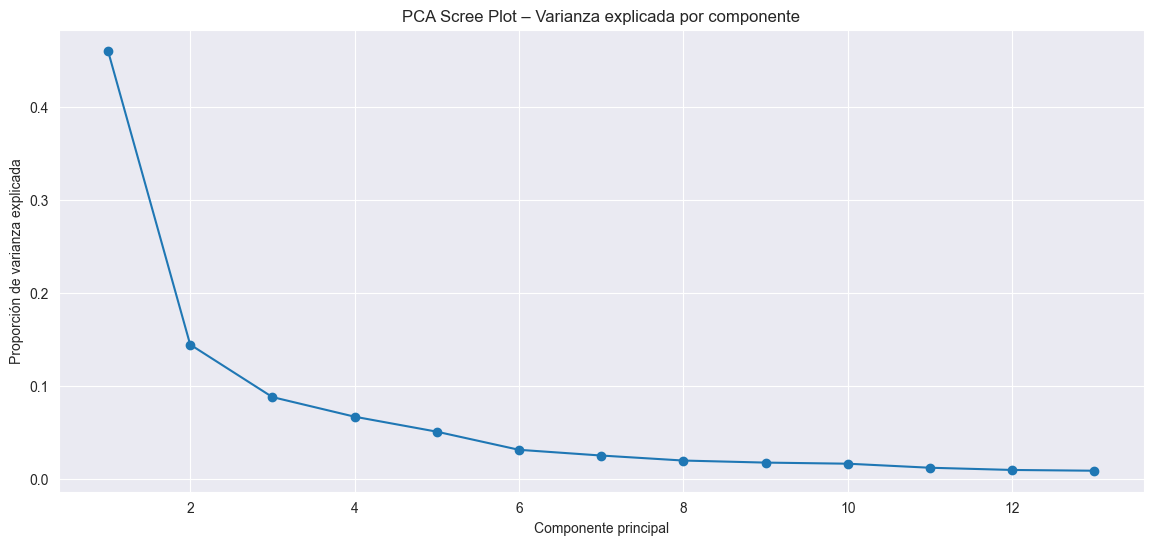

In [15]:
# -------------------------
# 4) PCA Exploratorio
# -------------------------

print("Ejecutando PCA exploratorio...")

# Solo utilizamos las features escaladas (ya sin NaNs)
X_only = df_exploratory.drop(columns=[DATE_COL, TARGET])

pca = PCA(n_components=PCA_VARIANCE_THRESHOLD)
pca.fit(X_only)

n_components_selected = pca.n_components_
print(f"Componentes seleccionados con {PCA_VARIANCE_THRESHOLD*100:.0f}% de varianza explicada:",
      n_components_selected)

# Cargas (loadings) de los componentes
loadings = pd.DataFrame(
    pca.components_[:n_components_selected].T,
    index=X_only.columns,
    columns=[f"PC{i+1}" for i in range(n_components_selected)]
)

# Peso de cada componente (varianza explicada)
weights = pca.explained_variance_ratio_[:n_components_selected]

# Importancia global por feature
pca_importance = (loadings.abs() * weights).sum(axis=1).rename("PCA_score")

# Guardar resultados
pca_importance.to_csv(os.path.join(OUTPUT_DIR, "pca_top25_features.csv"))
loadings.to_csv(os.path.join(OUTPUT_DIR, "pca_loadings.csv"))

print("PCA completado.")
print("Archivos guardados:",
      "\npca_top25_features.csv",
      "\npca_loadings.csv")

# -------------------------
# Scree Plot
# -------------------------

plt.figure(figsize=(14,6))
plt.plot(range(1, n_components_selected+1),
         pca.explained_variance_ratio_[:n_components_selected],
         marker='o')
plt.title("PCA Scree Plot – Varianza explicada por componente")
plt.xlabel("Componente principal")
plt.ylabel("Proporción de varianza explicada")
plt.grid(True)
plt.show()


## Interpretación del PCA exploratorio

El PCA aplicado al dataset imputado y escalado revela varios aspectos clave sobre la estructura
multivariada de las 59 características:

### 1. Alta redundancia y fuerte colinealidad
El primer componente principal (PC1) explica aproximadamente **el 47% de la varianza total**, lo cual es
un valor extremadamente alto y confirma la fuerte correlación existente entre muchas variables
financieras y macroeconómicas.

Este resultado es típico en mercados globales, donde diferentes activos reaccionan al mismo conjunto
de factores sistémicos (liquidez, sentimiento de riesgo, dólar fuerte/débil, inflación, etc.).

### 2. La mayor parte de la información se explica con pocos componentes
Los primeros 5 componentes (PC1–PC5) ya capturan cerca del **80% de la varianza**, lo cual indica que,
aunque el dataset contiene 59 variables, la dimensionalidad real es mucho menor: existen unos pocos
“drivers” fundamentales que explican la mayor parte del comportamiento conjunto.

Los 13 componentes necesarios para alcanzar el 95% de varianza confirman que:

- hay información adicional en algunos grupos de variables,
- pero la mayor parte del dataset está fuertemente correlacionado,
- y existe redundancia significativa.

### 3. Implicación práctica para la selección de características
El ranking “PCA_score” derivado de las cargas (loadings) proporciona una primera medida de la
importancia global de cada variable dentro de las principales direcciones de variabilidad.

Este ranking no es un criterio de selección final (no tiene interpretación causal), pero sí ayuda a:

- identificar variables que concentran información redundante,
- decidir qué features podrían eliminarse en etapas de reducción de colinealidad,
- y anticipar qué grupos de variables dominan la estructura del dataset.

### 4. Coherencia con el comportamiento observado en el heatmap
La necesidad de 13 componentes para alcanzar el 95% es consistente con lo observado en el análisis de
missingness: el dataset combina variables históricas y modernas con patrones muy diferentes, lo cual
introduce variabilidad adicional en los últimos PCs.

### Conclusión del PCA
El PCA confirma que el dataset es **altamente colineal** y que gran parte de la estructura puede
resumirse en unas pocas dimensiones latentes. Este diagnóstico respalda la necesidad de aplicar
métodos de selección de características y filtrado de multicolinealidad en etapas posteriores.


## 5) Análisis de correlaciones (Pearson y Spearman)

Después del PCA exploratorio, el siguiente paso del EDA consiste en estudiar las **relaciones
bivariadas** entre las variables. Este análisis es fundamental para comprender:

- qué features mantienen correlación lineal con `gold_spot` (Pearson),
- qué relaciones monotónicas existen aunque no sean lineales (Spearman),
- qué grupos de variables están fuertemente correlacionados entre sí (redundancia),
- y qué señales destacan preliminarmente como candidatas relevantes o redundantes.

Se aplican dos métricas complementarias:

### Pearson
Captura correlación lineal directa. Muy útil para variables macroeconómicas y financieras.

### Spearman
Captura relaciones monotónicas. Es más robusto a outliers y no requiere linealidad.

A partir de estas correlaciones generaremos:

- un fichero completo con la matriz de Pearson,
- otro con la matriz de Spearman,
- un ranking de correlaciones con el target, ambos métodos,
- y visualizaciones del top 15 para interpretar las relaciones significativas.

Esto nos permitirá comparar este análisis con el PCA y comenzar a identificar:

- redundancia (features casi duplicadas),
- clusters de variables altamente relacionadas,
- y primeras señales candidatas para selección de características.


Calculando correlaciones entre features (sin el target)...
Matrices guardadas.
Calculando correlación de cada feature con el target...


,feature,pearson_with_target,spearman_with_target
6,gold_futures,0.999963,0.999840
53,export_price_index,0.998401,0.993826
30,etf_gold_flows,0.997743,0.913257
4,silver_futures,0.926145,0.921107
10,silver_spot,0.924587,0.919959
46,us_m2,0.920791,0.813194
55,us_gdp,0.911180,0.813381
56,google_trends_gold_element,0.899124,0.823285
42,us_cpi,0.893901,0.814222
19,copper_futures,0.890791,0.904478


feature_corr_with_target.csv guardado correctamente


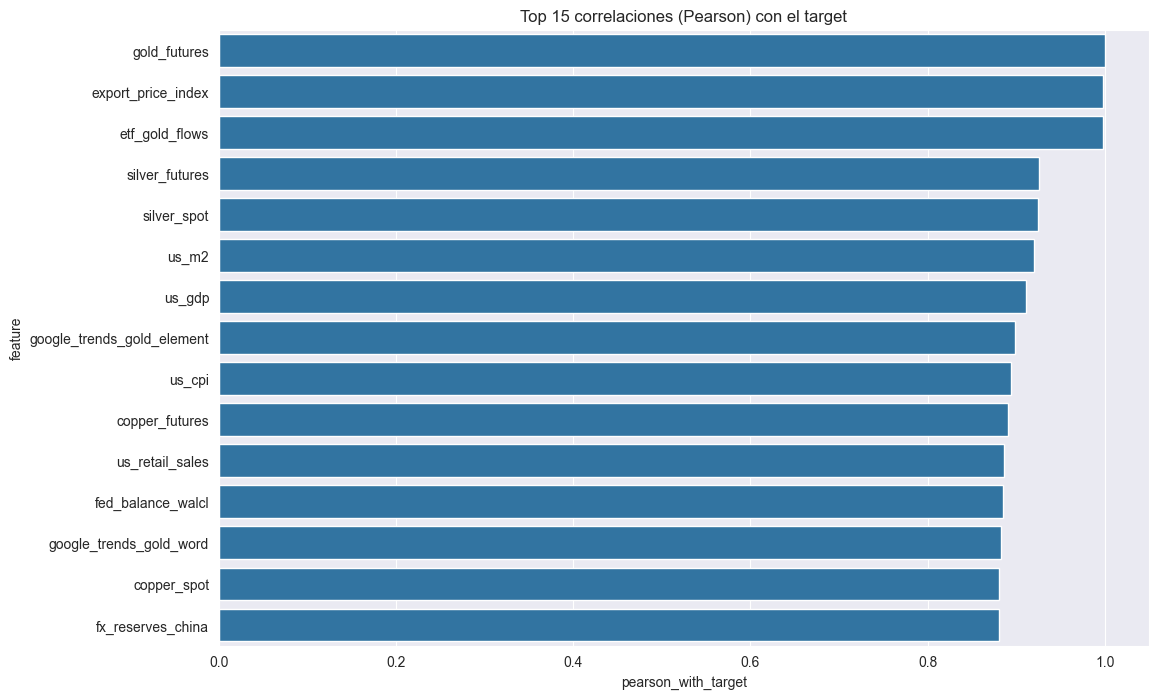

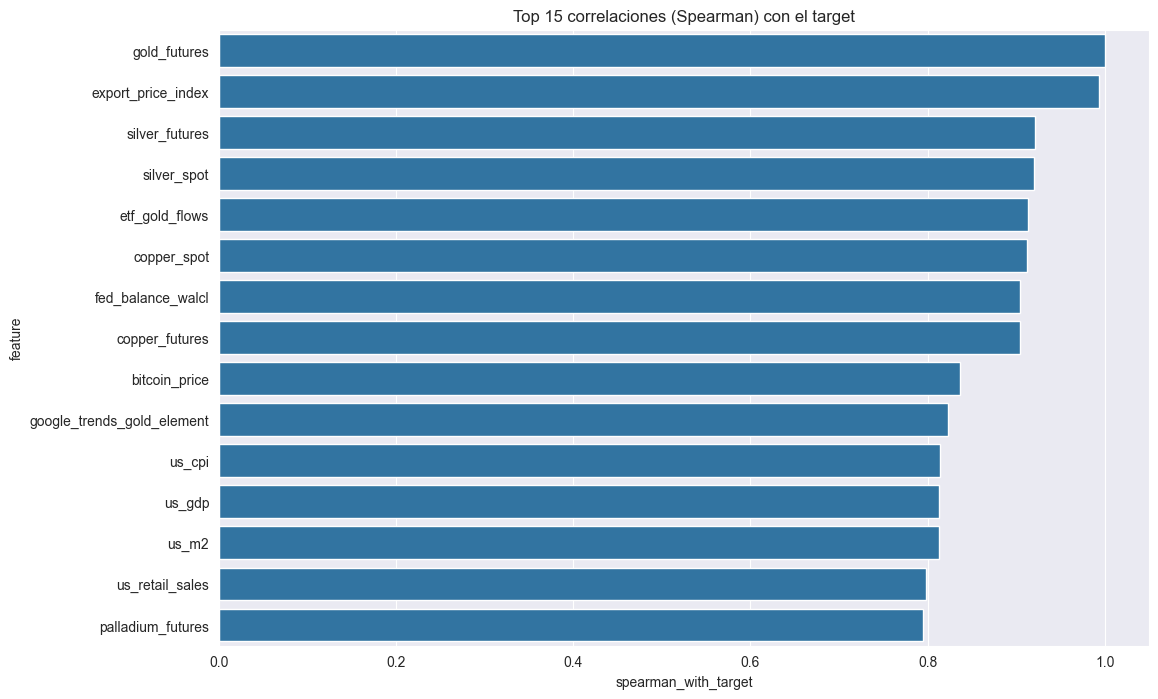

In [16]:
# -------------------------
# 5) Correlaciones
# -------------------------

print("Calculando correlaciones entre features (sin el target)...")

X_scaled = df_exploratory.drop(columns=[DATE_COL, TARGET])
y = df_exploratory[TARGET]

# Correlación entre features
corr_pearson = X_scaled.corr(method="pearson")
corr_spearman = X_scaled.corr(method="spearman")

corr_pearson.to_csv(os.path.join(OUTPUT_DIR, "feature_corr_matrix_pearson.csv"))
corr_spearman.to_csv(os.path.join(OUTPUT_DIR, "feature_corr_matrix_spearman.csv"))

print("Matrices guardadas.")

# -------------------------
# 5.1 Correlación con el target
# -------------------------

print("Calculando correlación de cada feature con el target...")

X_corr = X_scaled.copy()
X_corr[TARGET] = y

corr_pearson_full = X_corr.corr(method="pearson")
corr_spearman_full = X_corr.corr(method="spearman")

corr_with_target = pd.DataFrame({
    "feature": X_scaled.columns,
    "pearson_with_target": corr_pearson_full[TARGET][X_scaled.columns].values,
    "spearman_with_target": corr_spearman_full[TARGET][X_scaled.columns].values
})

corr_with_target = corr_with_target.sort_values("pearson_with_target", ascending=False)
corr_with_target.to_csv(os.path.join(OUTPUT_DIR, "feature_corr_with_target.csv"), index=False)

display(corr_with_target.head(20))

print("feature_corr_with_target.csv guardado correctamente")

# -------------------------
# 5.2 Visualización (Top 15)
# -------------------------

top15_pearson = corr_with_target.head(15)
top15_spearman = corr_with_target.sort_values("spearman_with_target", ascending=False).head(15)

plt.figure(figsize=(12,8))
sns.barplot(data=top15_pearson, y="feature", x="pearson_with_target")
plt.title("Top 15 correlaciones (Pearson) con el target")
plt.xlabel("pearson_with_target")
plt.ylabel("feature")
plt.show()

plt.figure(figsize=(12,8))
sns.barplot(data=top15_spearman, y="feature", x="spearman_with_target")
plt.title("Top 15 correlaciones (Spearman) con el target")
plt.xlabel("spearman_with_target")
plt.ylabel("feature")
plt.show()


## 6) Análisis de correlaciones con el target (Pearson y Spearman)

Una vez imputado y escalado el dataset exploratorio, se evaluó la relación entre cada
característica y el precio spot del oro (`gold_spot`) utilizando dos métricas
complementarias:

- **Correlación de Pearson** → mide relación lineal directa.
- **Correlación de Spearman** → mide relaciones monotónicas (no necesariamente lineales), más robusta ante outliers.

El objetivo de este análisis no es seleccionar aún las variables finales, sino:

- identificar señales económicas coherentes,
- detectar grupos de variables muy correlacionadas (redundancia),
- y comparar la información obtenida con el PCA exploratorio.

---

### Resultados principales (Top 15 Pearson)

En el ranking de Pearson se observan correlaciones extremadamente altas (≈0.85–0.99) entre el precio del oro y varios activos relacionados directamente con su mercado:

- **gold_futures** (≈0.99)
- **export_price_index**
- **etf_gold_flows**
- **silver_futures**
- **silver_spot**

Este comportamiento es completamente esperado:
- Los futuros del oro se mueven casi uno a uno con el spot.
- La plata (spot y futuros) mantiene relación estructural con el oro por pertenecer al mismo grupo de *precious metals*.
- Las entradas/salidas de ETFs de oro reflejan flujos de inversión directamente relacionados con movimientos del precio.
- El índice de precios de exportación y algunas variables macroeconómicas (PIB, M2, CPI) muestran también una correlación positiva relevante.

Este patrón confirma que el dataset contiene señales realistas y coherentes con la estructura económica del mercado del oro.

---

### Resultados principales (Top 15 Spearman)

En Spearman se confirma el patrón anterior, lo que indica que la relación no solo es lineal, sino **monótona estable**:

- **gold_futures** sigue siendo el más correlacionado.
- Plata (spot y futuros), cobre, ETF flows y variables macroeconómicas mantienen posiciones destacadas.
- Aparece **bitcoin_price** dentro del top 15 (Spearman), lo que no ocurre en Pearson.

Esto último sugiere:

- Su relación con el oro no es estrictamente lineal,
- pero sí muestra un patrón ordenado a largo plazo (monotonía),
- consistente con episodios donde ambos activos actúan como instrumentos de refugio o especulación alternativa.

---

### Redundancia evidente

Los resultados muestran un conjunto de features que transmiten casi la misma información:

- gold_futures ↔ gold_spot
- silver_futures ↔ silver_spot
- copper_futures ↔ copper_spot
- google_trends_gold_element ↔ google_trends_gold_word
- PIB, CPI, M2, retail_sales (macro relacionadas entre sí)

Esto confirma lo que ya sugería el PCA:

> **Existe redundancia estructural alta en el dataset** (multicolinealidad significativa).

Este hallazgo refuerza la necesidad de aplicar métodos de:
- **reducción de dimensionalidad**,
- **VIF filtering**,
- y **clustering de features**
en la siguiente etapa de selección de características.

---

### Coherencia con el PCA exploratorio

El PCA había mostrado que:
- **Pocas componentes agrupan gran parte de la varianza**,
- La primera componente captura una combinación fuerte de precios de metales y flujos financieros,
- Las siguientes componentes incorporan macroeconomía y riesgo.

Las correlaciones confirman esta lectura:
los metales preciosos son las señales más dominantes y explican buena parte de la estructura de la varianza.

---

### Conclusión del análisis de correlaciones

- Las correlaciones son **económicamente coherentes** y respaldan la calidad del dataset.
- Existen grupos de variables extremadamente redundantes.
- Las relaciones del top 15 son dominadas por metales preciosos, flujos financieros y macroeconómicas clave.
- Se confirma la necesidad de aplicar **selección de características avanzada** en la siguiente etapa.

Este análisis servirá como referencia para el filtrado posterior basado en PCA, VIF, clustering y métodos basados en modelos.


## 7) Análisis exploratorio de multicolinealidad mediante VIF

Además de las correlaciones bivariadas, es necesario evaluar la presencia de
multicolinealidad entre las variables. Este fenómeno aparece cuando una o varias
features pueden expresarse como combinación lineal de otras, lo que dificulta:

- la interpretación individual de cada variable,
- la estabilidad de los modelos lineales,
- la robustez del entrenamiento,
- y la generalización del modelo.

Para medir este efecto utilizamos el **Variance Inflation Factor (VIF)**, que estima
cuánto se infla la varianza de los coeficientes debido a la redundancia entre features.

Interpretación estándar del VIF:

- **VIF = 1 → Sin colinealidad**
- **VIF < 5 → Aceptable**
- **VIF 5–10 → Colinealidad moderada**
- **VIF > 10 → Colinealidad severa (variable problemática)**
- **VIF > 30–50 → Colapsa cualquier modelo lineal**

Dado que nuestro dataset contiene múltiples activos financieros estrechamente relacionados (oro, plata, cobre, ETF flows), así como indicadores macroeconómicos interdependientes (CPI, M2, GDP…), es esperable encontrar VIF altos.

Este análisis exploratorio permitirá identificar los grupos de variables redundantes y servirá como base para la fase posterior de selección mediante:
- filtrado por VIF,
- clustering de correlaciones,
- PCA,
- o selección basada en modelos.


In [17]:
# -------------------------
# 7) Cálculo exploratorio del VIF
# -------------------------

print("Calculando VIF (Variance Inflation Factor)...")

# Matriz numérica (sin fecha y sin target)
X_vif = df_exploratory.drop(columns=[DATE_COL, TARGET])

vif_data = []
for i, col in enumerate(X_vif.columns):
    try:
        vif_val = variance_inflation_factor(X_vif.values, i)
    except Exception:
        vif_val = np.nan
    vif_data.append({"feature": col, "VIF": vif_val})

vif_df = pd.DataFrame(vif_data).sort_values("VIF", ascending=False)

# Guardar resultado
vif_df.to_csv(os.path.join(OUTPUT_DIR, "vif_exploratorio.csv"), index=False)

display(vif_df.head(20))
print("Archivo guardado: vif_exploratorio.csv")


Calculando VIF (Variance Inflation Factor)...


,feature,VIF
4,silver_futures,6338.192843
10,silver_spot,6308.678830
55,us_gdp,3250.874551
46,us_m2,2759.862917
42,us_cpi,2725.757020
6,gold_futures,2467.336539
30,etf_gold_flows,2350.592333
12,wti_futures,1695.261504
16,wti_spot,1626.915319
18,brent_futures,1378.991953


Archivo guardado: vif_exploratorio.csv


## 8) Necesidad de un tratamiento avanzado de redundancia y multicolinealidad

Tras el análisis exploratorio, el cálculo del VIF y la inspección de las matrices de correlación,
queda claro que el dataset presenta un nivel extremadamente alto de multicolinealidad y redundancia.
Este comportamiento es habitual en datasets financieros y macroeconómicos:

- precios spot y futuros suelen estar casi perfectamente correlacionados,
- metales preciosos se mueven de forma conjunta,
- indicadores macroeconómicos comparten tendencias de largo plazo,
- índices financieros capturan información similar (riesgo, liquidez, volatilidad).

La multicolinealidad severa afecta negativamente a:

- la estabilidad de modelos lineales (coeficientes inestables),
- la interpretabilidad,
- el rendimiento de modelos basados en regularización,
- la capacidad del modelo para generalizar.

Por ello aplicaremos dos estrategias complementarias:

### **1) Agrupación por correlación (Correlation Clustering)**
- Se combinan las matrices de correlación Pearson y Spearman.
- Se genera una matriz de "similaridad robusta".
- Se agrupan features que superen un umbral alto (ej. ≥ 0.97).
- Se forman clusters de variables redundantes.
- De cada cluster se seleccionará un representante (o varios, según estrategia).

### **2) Reducción iterativa por VIF**
- Se calcula el VIF para el conjunto de variables aún supervivientes.
- Si alguna feature presenta VIF > 10, se elimina la que más contribuya.
- El proceso se repite hasta que todas las variables cumplan VIF ≤ 10.

Este pipeline híbrido permite obtener un conjunto final de características:

- no redundantes,
- informativamente diversas,
- estables estadísticamente,
- y aptas para cualquier algoritmo.

Este conjunto se usará en la etapa de modelado.


Para abordar la redundancia estructural y la multicolinealidad del dataset,
se diseñó un proceso de selección de características basado en dos métodos
complementarios:

1. **Agrupación por correlación (Correlation Clustering):**
   Se combinaron las correlaciones de Pearson y Spearman para obtener una
   matriz de similaridad robusta. A partir de ella se identificaron grupos
   (clusters) de variables altamente redundantes utilizando umbrales próximos
   a 0.97–0.98. Cada cluster representa un conjunto de características que
   aportan información prácticamente equivalente; de cada grupo se seleccionó
   una variable representativa, reduciendo así la dimensionalidad efectiva del
   sistema sin pérdida sustancial de información.

2. **Reducción iterativa del VIF:**
   Para garantizar la ausencia de multicolinealidad severa, se aplicó un
   algoritmo iterative-VIF que elimina de manera sucesiva las variables con
   valores superiores a 10. El proceso se repite recalculando VIF en cada
   iteración hasta que todas las características restantes cumplen con el
   criterio establecido.

La combinación de ambos métodos permite obtener un conjunto de variables:
(i) no redundantes, (ii) estadísticamente estables y (iii) adecuadas tanto
para modelos lineales como no lineales. Esta reducción controlada de la
dimensionalidad constituye un paso crítico para mejorar la estabilidad
del modelado, la interpretabilidad de los resultados y la capacidad de
generalización del sistema predictivo.


In [18]:
import numpy as np
import pandas as pd

def correlation_clustering(df, threshold=0.97):
    """
    Agrupa features altamente correlacionadas usando Pearson+Spearman combinado.
    Devuelve lista de clusters (listas de columnas).
    """

    pearson_corr = df.corr(method="pearson").abs()
    spearman_corr = df.corr(method="spearman").abs()

    # matriz combinada robusta
    combined = (pearson_corr + spearman_corr) / 2

    visited = set()
    clusters = []

    for col in combined.columns:
        if col in visited:
            continue

        cluster = combined.columns[combined[col] >= threshold].tolist()
        clusters.append(cluster)

        for c in cluster:
            visited.add(c)

    return clusters


In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def reduce_vif(df, thresh=10.0):
    """
    Elimina iterativamente variables con VIF > umbral.
    Devuelve lista final de columnas elegidas.
    """
    cols = df.columns.tolist()

    while True:
        vif_values = [variance_inflation_factor(df[cols].values, i)
                      for i in range(len(cols))]
        max_vif = max(vif_values)
        if max_vif <= thresh:
            break

        # eliminar variable con VIF mayor
        remove_col = cols[vif_values.index(max_vif)]
        print(f"Eliminando por VIF alto: {remove_col} (VIF = {max_vif:.2f})")

        cols.remove(remove_col)

    return cols


In [20]:
# 1) Clustering por correlación
clusters = correlation_clustering(X_scaled, threshold=0.97)

selected_from_clusters = []
for group in clusters:
    # criterio simple: elegir la feature con mayor varianza o la más completa
    rep = group[0]
    selected_from_clusters.append(rep)

# DataFrame reducido
X_reduced_corr = X_scaled[selected_from_clusters]

# 2) Reducción por VIF
final_features = reduce_vif(X_reduced_corr, thresh=10)

print("Número final de features:", len(final_features))
print(final_features)


Eliminando por VIF alto: etf_gold_flows (VIF = 1584.66)
Eliminando por VIF alto: us_cpi (VIF = 716.54)
Eliminando por VIF alto: sp500_futures (VIF = 579.39)
Eliminando por VIF alto: commodities_crb (VIF = 364.88)
Eliminando por VIF alto: gold_futures (VIF = 337.65)
Eliminando por VIF alto: usdinr_exchange (VIF = 171.61)
Eliminando por VIF alto: fx_reserves_china (VIF = 166.51)
Eliminando por VIF alto: us2y_yield (VIF = 161.59)
Eliminando por VIF alto: sp500_index (VIF = 112.06)
Eliminando por VIF alto: palladium_futures (VIF = 103.95)
Eliminando por VIF alto: us_industrial_production (VIF = 55.52)
Eliminando por VIF alto: google_trends_gold_element (VIF = 49.51)
Eliminando por VIF alto: fed_balance_walcl (VIF = 40.68)
Eliminando por VIF alto: copper_futures (VIF = 34.58)
Eliminando por VIF alto: platinum_spot (VIF = 30.36)
Eliminando por VIF alto: comex_micro_gold (VIF = 27.22)
Eliminando por VIF alto: us10y_yield (VIF = 24.85)
Eliminando por VIF alto: wti_futures (VIF = 16.84)
Elimina

### 9) Interpretación del proceso de reducción por VIF (Variance Inflation Factor)

El análisis del VIF confirmó de manera clara que el dataset original presentaba
una multicolinealidad extremadamente elevada. Algunas variables alcanzaron valores
de VIF superiores a 1000, lo cual significa que pueden explicarse casi
completamente a partir de combinaciones lineales de otras variables. Este fenómeno
es muy frecuente en datasets financieros y macroeconómicos, donde muchos
indicadores se mueven conjuntamente (por ejemplo, oro spot y futuros, spreads de
bonos, índices de commodities o tipos de cambio fuertemente correlacionados).

El algoritmo aplicado procede de forma iterativa:
1. Calcula el VIF de todas las variables activas.
2. Identifica la variable con el VIF más alto.
3. Si supera el umbral convencional de 10, la elimina.
4. Repite el proceso recalculando VIF tras cada eliminación.

La salida del proceso muestra cómo las primeras variables eliminadas tenían VIF
extremadamente altos (entre 300 y 1500), indicando redundancia casi total. Tras
aproximadamente 35 iteraciones, el conjunto final quedó reducido a **24 variables**
que cumplen el criterio VIF ≤ 10. Esto implica un conjunto de características:

- menos redundantes,
- matemáticamente estables,
- y adecuadas para métodos lineales y no lineales.

Es importante destacar que la reducción por VIF **no selecciona “las mejores” variables**, sino que elimina únicamente aquellas responsables de redundancia lineal. Por este motivo, el VIF se combinará con otros métodos (correlación, importancia de modelos y análisis económico) para la selección definitiva de características.


El cálculo del Variance Inflation Factor (VIF) permitió diagnosticar la presencia
de multicolinealidad severa en el conjunto inicial de características. Algunos
indicadores presentaron valores extremadamente elevados (en ocasiones superiores a
1000), lo cual evidencia una redundancia lineal profunda entre variables
financieras y macroeconómicas altamente correlacionadas entre sí.

Se aplicó un procedimiento iterativo que elimina, en cada paso, la variable con
el VIF más alto siempre que supere el umbral de 10. El algoritmo recalcula el VIF
tras cada eliminación y continúa hasta obtener un conjunto estadísticamente
estable. Como resultado, el número de características se redujo de aproximadamente
59 a **24 variables**, preservando aquellas que no presentan redundancia lineal
severa.

Este proceso no constituye una selección final de características, sino un paso
intermedio para garantizar estabilidad numérica en las siguientes fases del
proyecto. La selección definitiva se realizará combinando criterios de correlación,
información mutua, importancia de modelos y relevancia económica.


## 11) Visualizaciones EDA para variables numéricas (Regresión num-num)

Además de los análisis multivariantes y estructurales (correlaciones completas, PCA y VIF),
es fundamental examinar visualmente cómo se relacionan las características más relevantes
con el target `gold_spot`, así como comprender sus distribuciones individuales.

Este tipo de visualizaciones permite:

- detectar relaciones no lineales,
- identificar tendencias claras o saturaciones,
- observar colas pesadas y asimetría,
- detectar outliers relevantes,
- comprender mejor la naturaleza dinámica entre variables económicas.

A continuación, se incluyen las visualizaciones más útiles para un problema de regresión
numérica multivariante.

---

### **11.1 Scatterplots: relación directa con el target**

Se grafican las 10–15 variables con mayor correlación absoluta con `gold_spot`
(Pearson y Spearman). Estas gráficas permiten ver:

- si la relación es lineal o no,
- la presencia de clusters o rupturas de régimen,
- la dispersión y el nivel de ruido,
- si existen outliers o zonas de saturación.

---

### **11.2 Distribuciones (Histogramas y KDE)**

Se visualiza la distribución del target y de algunas características clave. Esto permite:

- evaluar la normalidad o desviaciones significativas,
- identificar colas gruesas o valores extremos,
- analizar escalas y rangos antes del escalado estándar.

---

### **11.3 Mutual Information (MI)**

La información mutua mide dependencias no lineales entre cada feature y el target.
Se muestran las 20 features con mayor MI en un barplot.
Este tipo de análisis complementa a las correlaciones lineales y ayuda a resaltar
relaciones más complejas que podrían pasar desapercibidas.

---

### **11.4 F-test Scores**

El F-test evalúa la fuerza de relación lineal entre cada feature y el target.
Se grafican los valores más significativos. Sirve como una segunda opinión lineal,
especialmente útil en series macroeconómicas con tendencias compartidas.

---

### **11.5 Pairplot reducido**

Dado que el dataset contiene ~60 variables, un pairplot completo no es informativo.
En su lugar, se construye un pairplot reducido con 3–5 variables relevantes (por ejemplo,
una de commodities, una de divisas, una macro y una de volatilidad). Este tipo de
visualización ayuda a entender interacciones simples entre grupos de variables.

---

### **11.6 Heatmap compacto de correlaciones**

Para evitar matrices de tamaño 60×60, se genera un heatmap únicamente para las 15
features con mayor correlación con el target. Esto permite visualizar rápidamente:

- redundancias entre variables importantes,
- grupos de comportamiento similar,
- patrones estructurales en el conjunto más relevante.

---

Con estas visualizaciones se cierra la etapa descriptiva del EDA, permitiendo una
comprensión mucho más rica del dataset antes de avanzar hacia el preprocesamiento
formal y la selección sistemática de características.


### 11.1 Scatterplots: relación feature vs target (Top features)

Se grafican scatterplots (con línea de tendencia) de las X features con mayor
correlación absoluta con `gold_spot` (combinando Pearson y Spearman).
Estos gráficos ayudan a detectar:

- relaciones lineales vs no lineales,
- heterocedasticidad,
- acumulación de outliers,
- cambios de régimen o saturaciones.

Ajusta `TOP_N` si quieres más/menos gráficos.


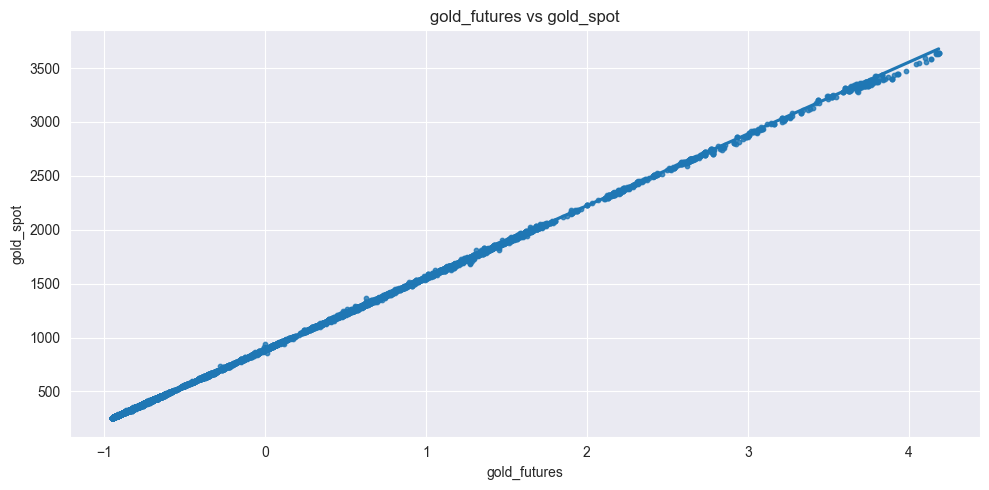

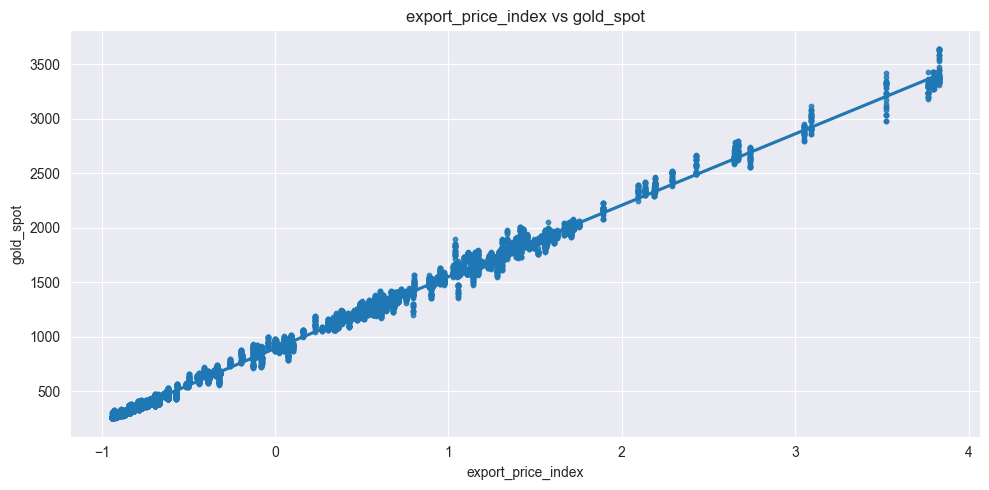

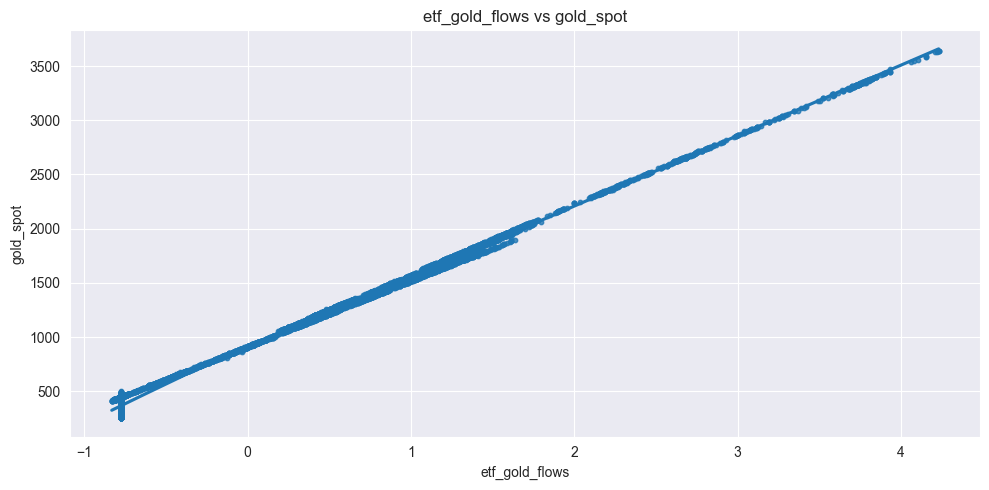

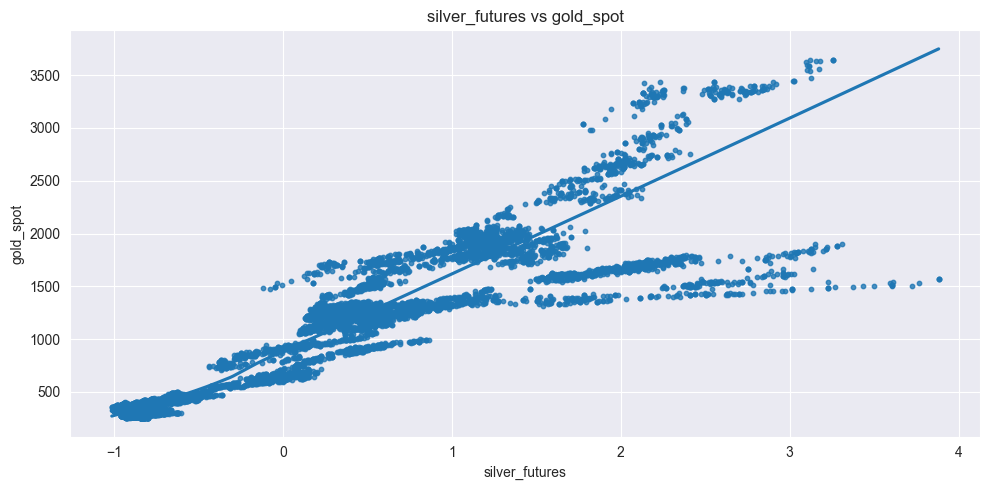

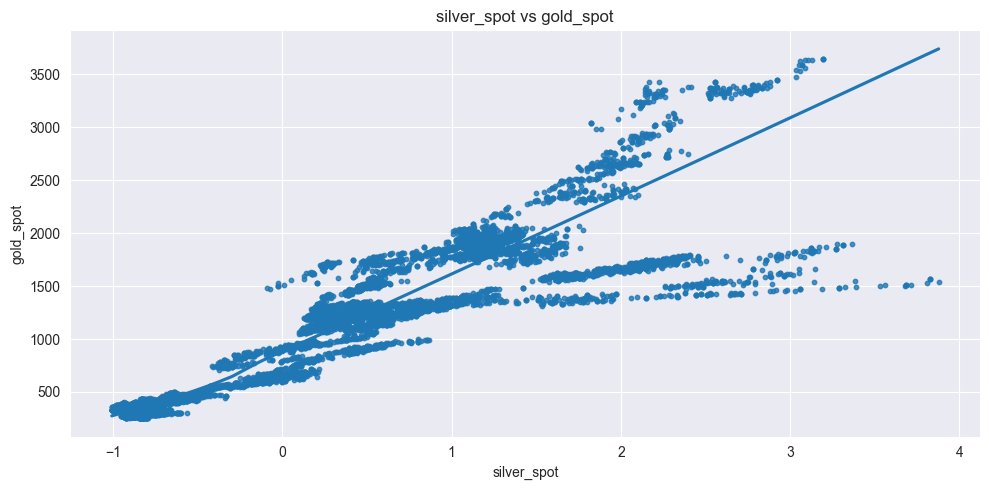

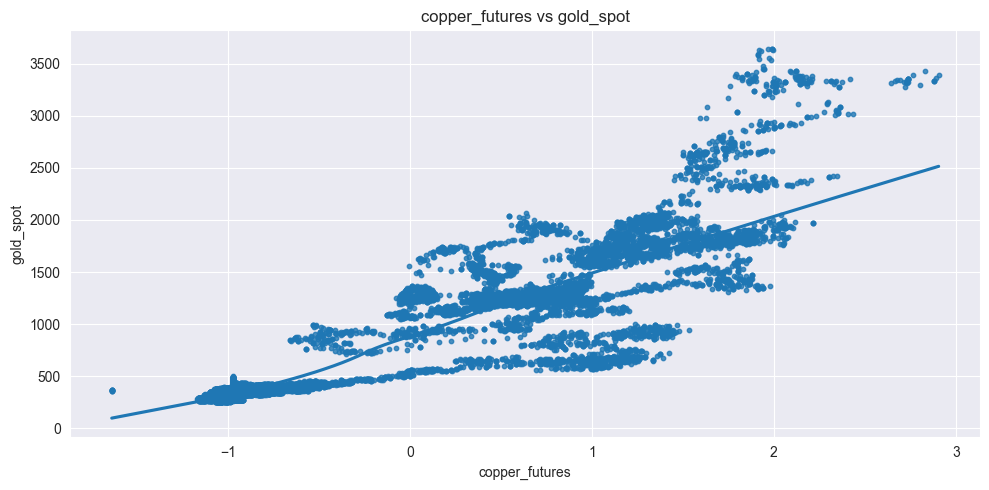

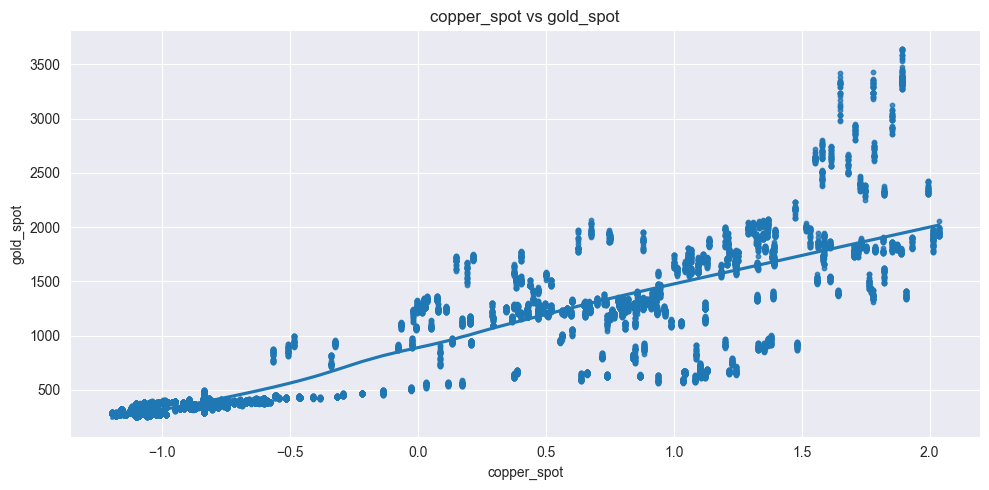

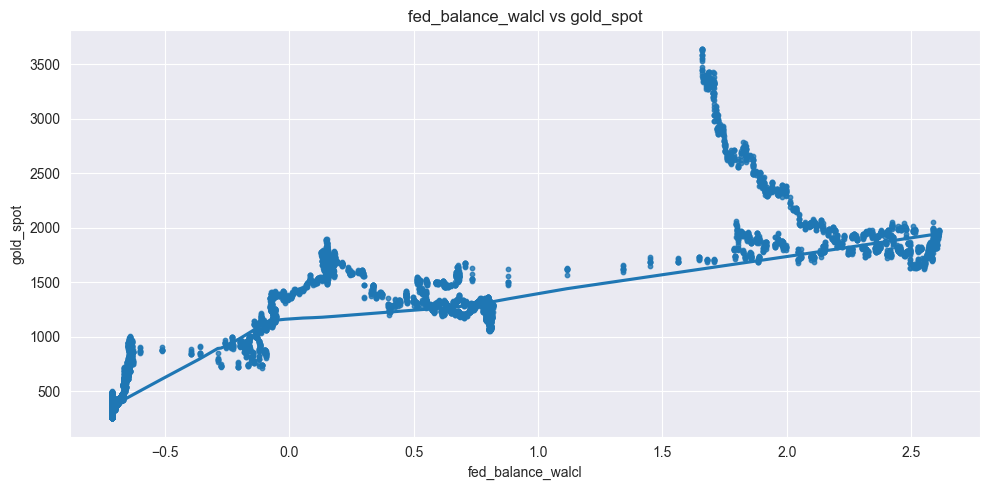

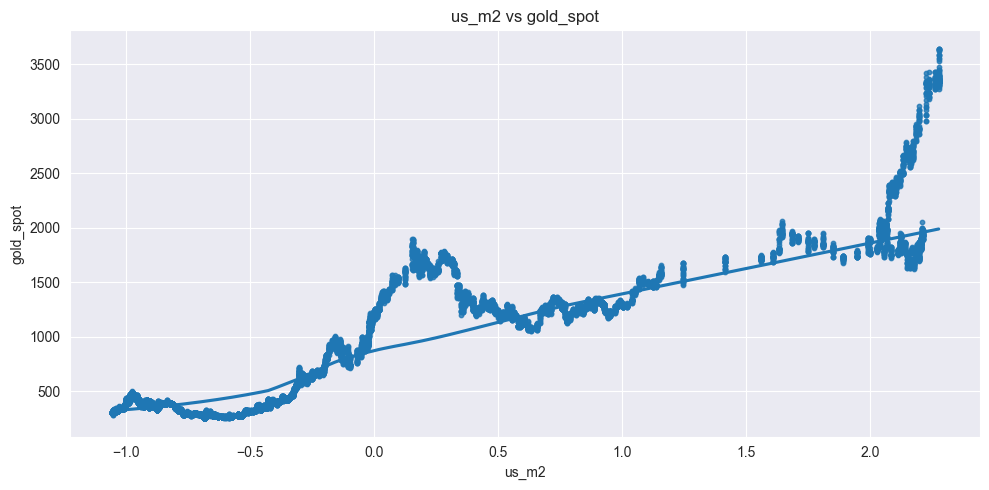

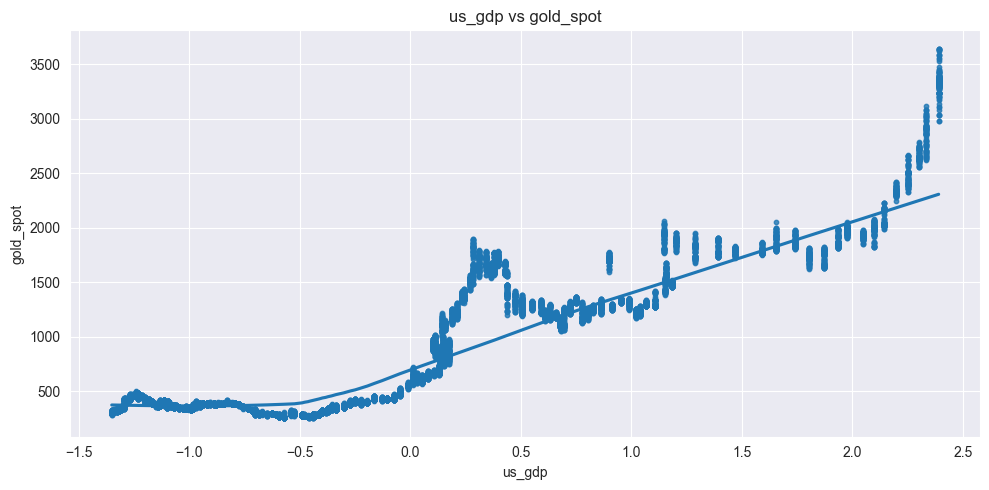

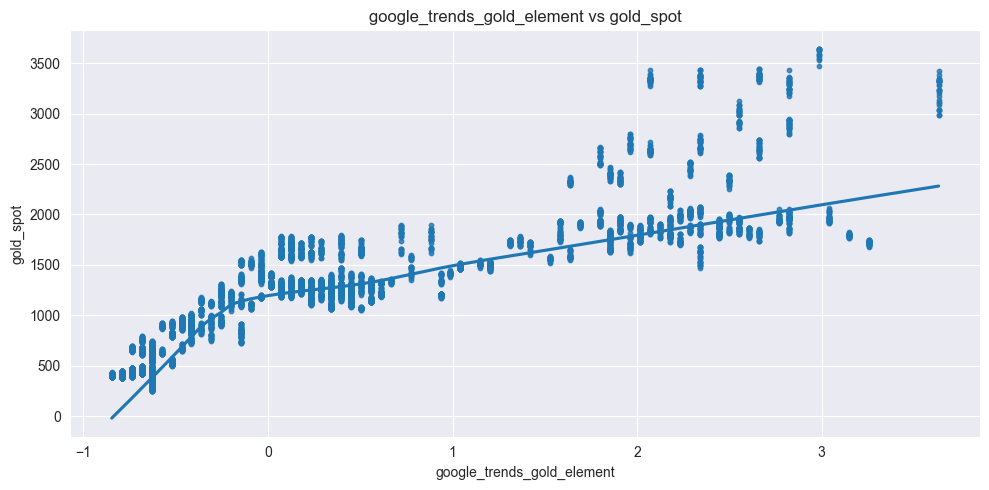

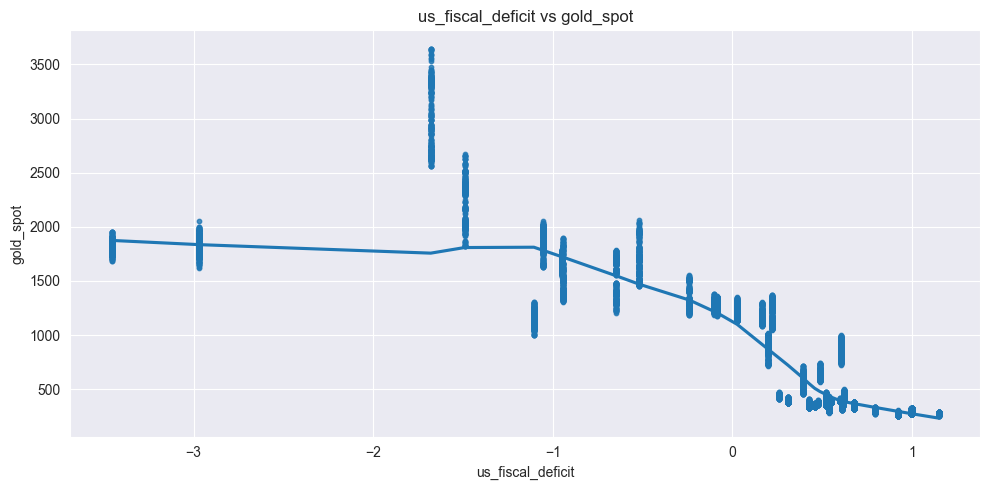

In [21]:
# 11.1 Scatterplots top N
import math
import os
import seaborn as sns
import matplotlib.pyplot as plt

TOP_N = 12  # ajusta
os.makedirs(OUTPUT_DIR, exist_ok=True)

# suponemos que corr_with_target existe como DataFrame con 'feature' y 'pearson_with_target' y 'spearman_with_target'
try:
    top_df = corr_with_target.copy()
except NameError:
    top_df = pd.read_csv(os.path.join(OUTPUT_DIR, "feature_corr_with_target.csv"))

# ordenar por valor absoluto combinado (media abs pearson+spearman)
top_df["abs_comb"] = (top_df["pearson_with_target"].abs() + top_df["spearman_with_target"].abs()) / 2
top_feats = top_df.sort_values("abs_comb", ascending=False).head(TOP_N)["feature"].tolist()

for feat in top_feats:
    plt.figure(figsize=(10,5))
    sns.regplot(x=df_exploratory[feat], y=df_exploratory[TARGET], scatter_kws={"s":10}, lowess=True)
    plt.title(f"{feat} vs {TARGET}")
    plt.xlabel(feat)
    plt.ylabel(TARGET)
    plt.tight_layout()
    fname = os.path.join(OUTPUT_DIR, f"scatter_{feat}_vs_{TARGET}.png")
    plt.savefig(fname, dpi=200)
    plt.show()


**Interpretación (ejemplo):**
- Si la nube de puntos muestra una nube estrecha con pendiente, la relación es
  aproximadamente lineal: la variable puede ser útil en modelos lineales.
- Si la nube muestra una forma curva o saturación (p. ej. relación logarítmica),
  considerar transformaciones (log, sqrt) o tratamiento no lineal.
- Si aparecen pocos puntos extremos muy alejados, anotar posibles outliers para
  revisarlos o tratarlos en la fase de preprocesado.
- Si la relación es muy ruidosa (spread amplio), la variable puede aportar poca
  señal por sí sola, aunque combinada con otras pueda ayudar.


### 11.2 Distribuciones: histogramas y KDE

Se muestran histogramas y curvas KDE del target y de algunas features
representativas. Esto permite observar asimetría, colas gruesas, multimodalidad
y otras propiedades de la distribución que informan decisiones de
transformación (e.g., log, winsorize, scaling robust).


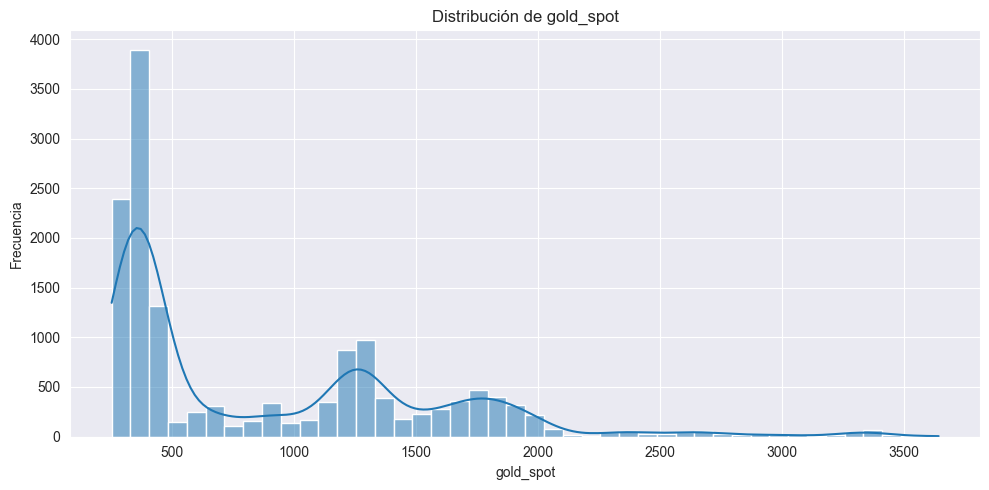

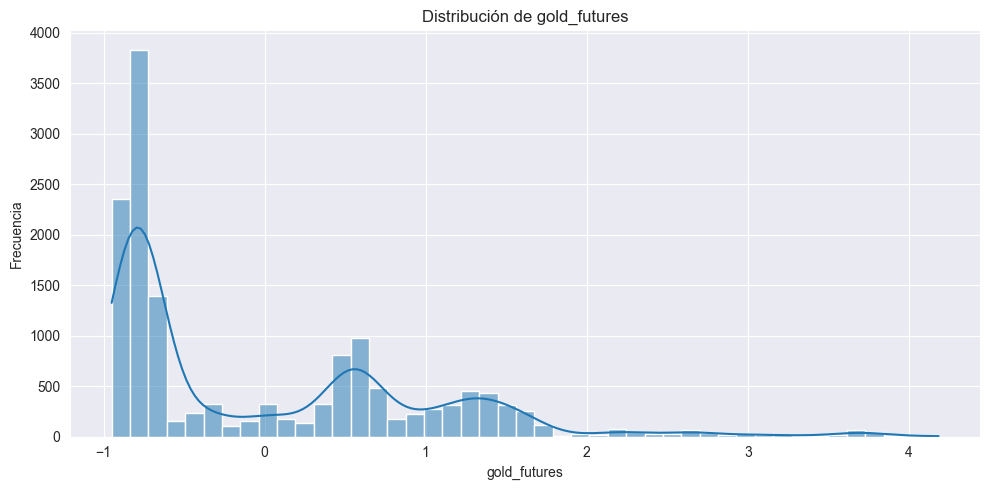

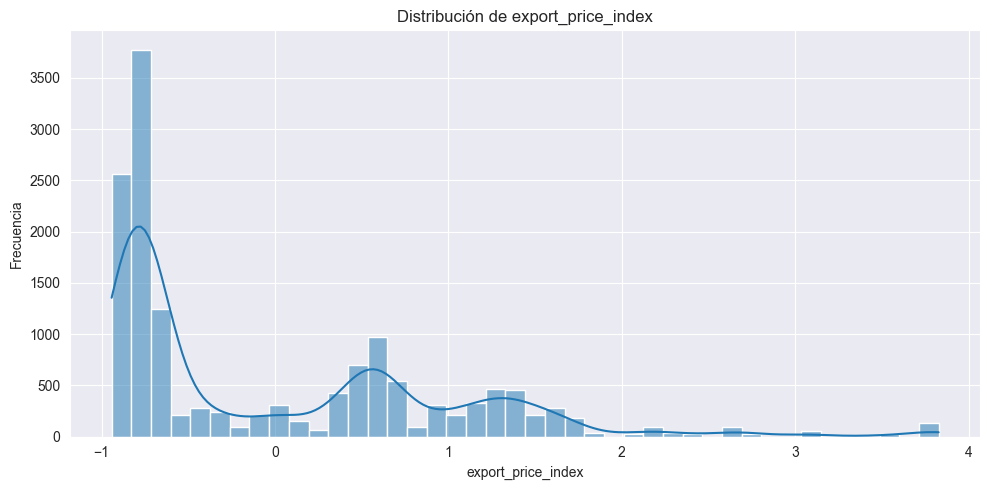

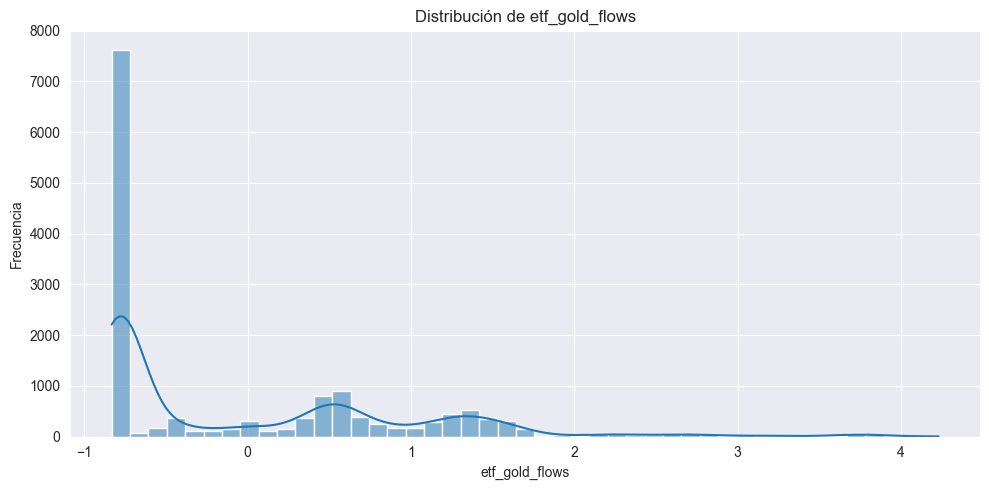

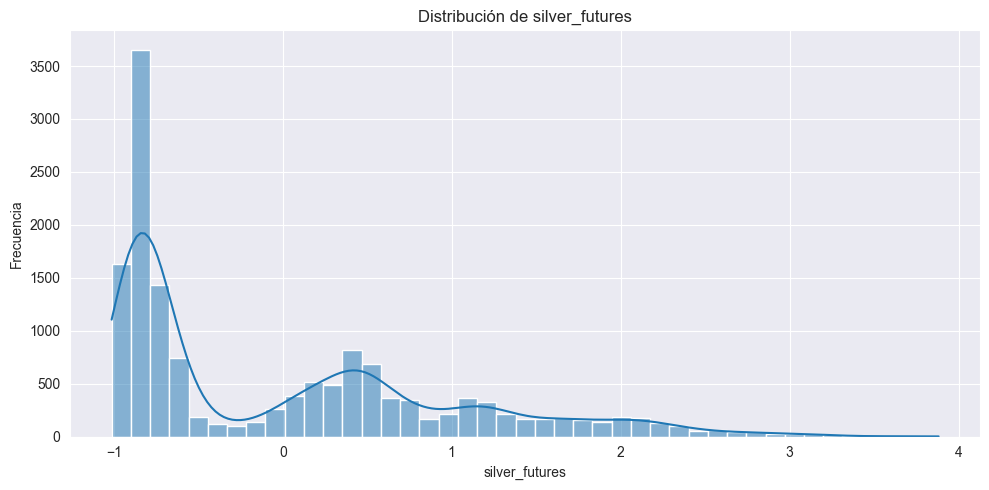

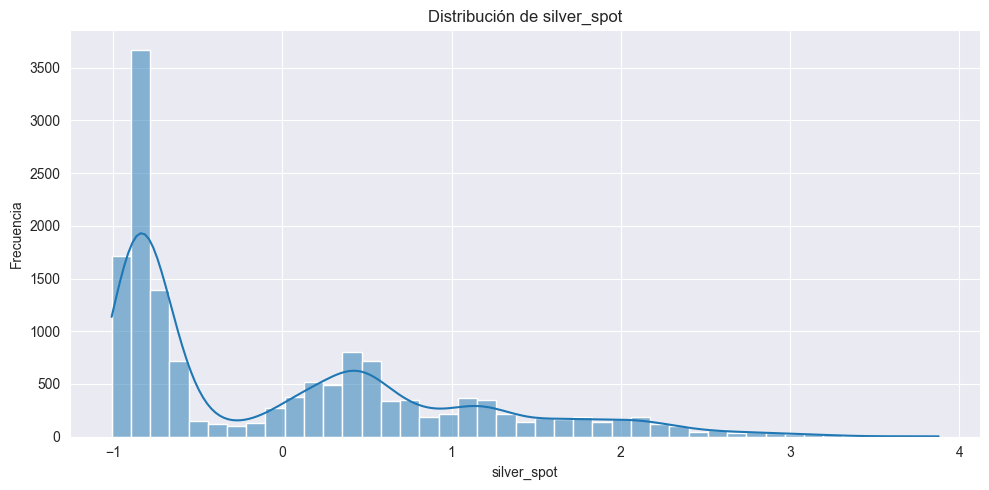

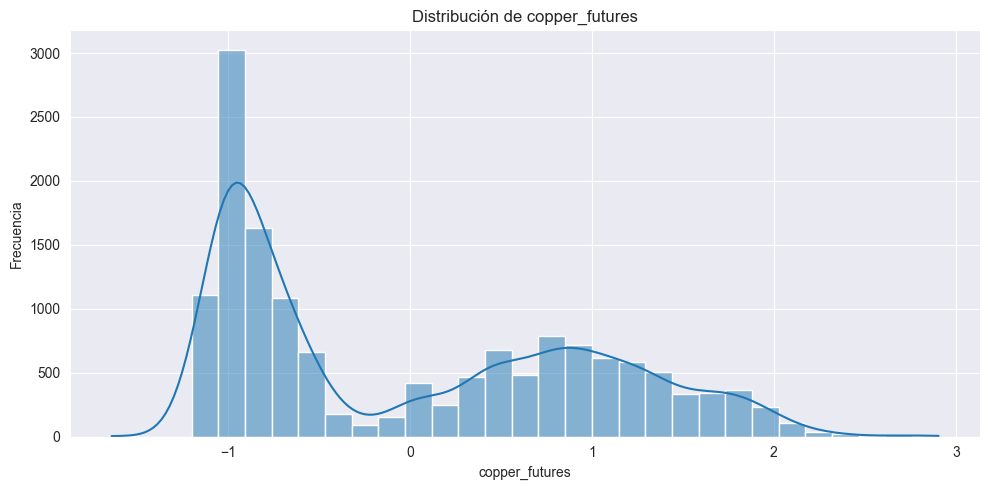

In [22]:
# 11.2 Histogramas y KDE
features_to_plot = [TARGET] + top_feats[:6]  # target + top 6 features
for feat in features_to_plot:
    plt.figure(figsize=(10,5))
    sns.histplot(df_exploratory[feat].dropna(), kde=True)
    plt.title(f"Distribución de {feat}")
    plt.xlabel(feat)
    plt.ylabel("Frecuencia")
    plt.tight_layout()
    fname = os.path.join(OUTPUT_DIR, f"dist_{feat}.png")
    plt.savefig(fname, dpi=200)
    plt.show()


**Interpretación (ejemplo):**
- Si `gold_spot` muestra asimetría positiva fuerte, considerar transformación logarítmica para ciertos modelos.
- Si algunas features presentan colas muy pesadas o valores atípicos extremos,
  valorar winsorize o truncamiento en el pipeline de modelado.


### 11.3 Información mutua (Mutual Information)

La información mutua (MI) mide dependencia **no lineal** entre cada feature y el target.
Es complementaria a Pearson/Spearman y sirve para destacar variables que
tienen relación no lineal fuerte con `gold_spot`.


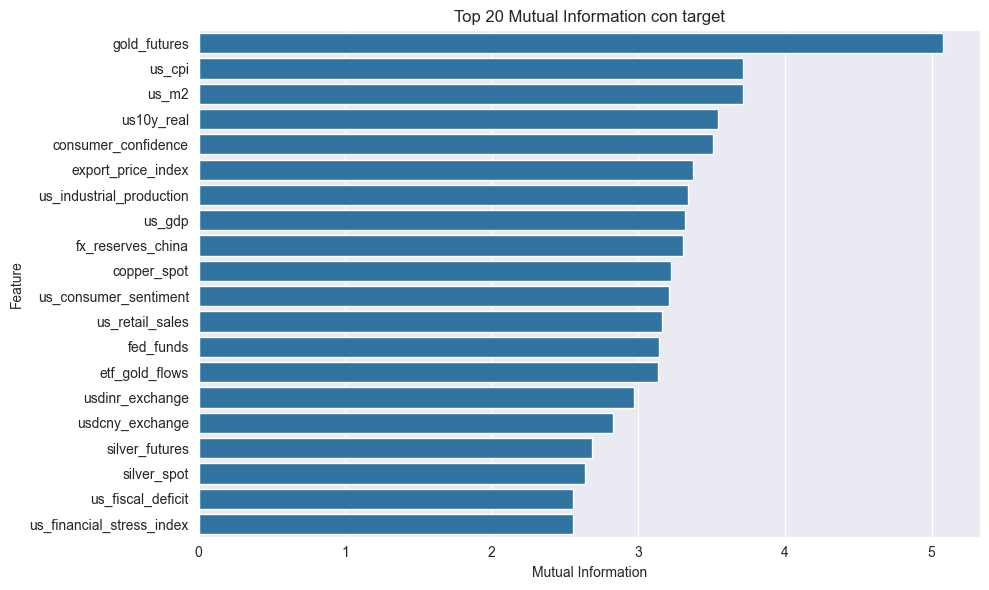

In [23]:
# 11.3 Mutual Information barplot
from sklearn.feature_selection import mutual_info_regression

# X_scaled contiene solo features; y es la serie target
X_mi = X_scaled.copy()
y_mi = y.copy().astype(float)

mi = mutual_info_regression(X_mi.fillna(0).values, y_mi.fillna(0).values, random_state=RF_RANDOM_STATE)
mi_s = pd.Series(mi, index=X_mi.columns).sort_values(ascending=False)

TOP_MI = 20
plt.figure(figsize=(10,6))
sns.barplot(x=mi_s.head(TOP_MI).values, y=mi_s.head(TOP_MI).index)
plt.title("Top {} Mutual Information con target".format(TOP_MI))
plt.xlabel("Mutual Information")
plt.ylabel("Feature")
plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_DIR, "mutual_information_top20.png"), dpi=200)
plt.show()

# guardar valores
mi_s.to_csv(os.path.join(OUTPUT_DIR, "mutual_info_all_features.csv"))


**Interpretación (ejemplo):**
- Las features con alto MI tienen dependencia informativa con el target,
  incluso si su correlación lineal es baja.
- Comparar el ranking MI con el ranking de correlación: si una variable
  aparece alta en MI pero baja en Pearson, su relación es probablemente no lineal.
- Estas features son candidatas para pruebas en modelos no lineales o para transformaciones.


### 11.4 F-test univariado (F-statistic)

El F-test mide la fuerza de asociación lineal de cada feature con el target
(básicamente la varianza explicada por esa feature en un ANOVA/simple regresión).
Se usa aquí como complemento de Pearson/MI.


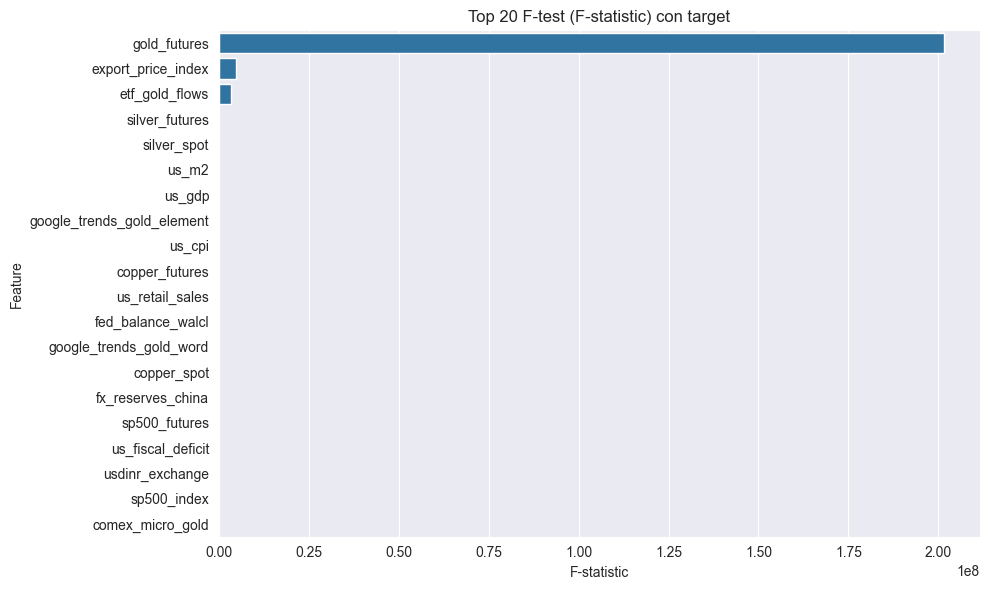

In [24]:
# 11.4 F-test
from sklearn.feature_selection import f_regression

X_f = X_scaled.copy()
y_f = y.copy().astype(float)

f_vals, p_vals = f_regression(X_f.fillna(0).values, y_f.fillna(0).values)
f_s = pd.Series(f_vals, index=X_f.columns).sort_values(ascending=False)

TOP_F = 20
plt.figure(figsize=(10,6))
sns.barplot(x=f_s.head(TOP_F).values, y=f_s.head(TOP_F).index)
plt.title("Top {} F-test (F-statistic) con target".format(TOP_F))
plt.xlabel("F-statistic")
plt.ylabel("Feature")
plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_DIR, "f_test_top20.png"), dpi=200)
plt.show()

# guardar
pd.DataFrame({"feature": f_s.index, "F": f_s.values}).to_csv(os.path.join(OUTPUT_DIR, "f_test_all_features.csv"), index=False)


**Interpretación (ejemplo):**
- Altos F-statistics indican que la variable explica parte de la varianza del target
  bajo un modelo lineal simple.
- Combinar F-test con MI y Pearson ayuda a priorizar features
  que son al mismo tiempo informativas y estables.


### 11.5 Pairplot reducido (interacciones)

Para evitar saturar el pairplot, se seleccionan 3–5 features representativas
(o elegidas manualmente) y se genera un pairplot con `gold_spot`.
Esto facilita observar interacciones bivariadas y patrones conjuntos.


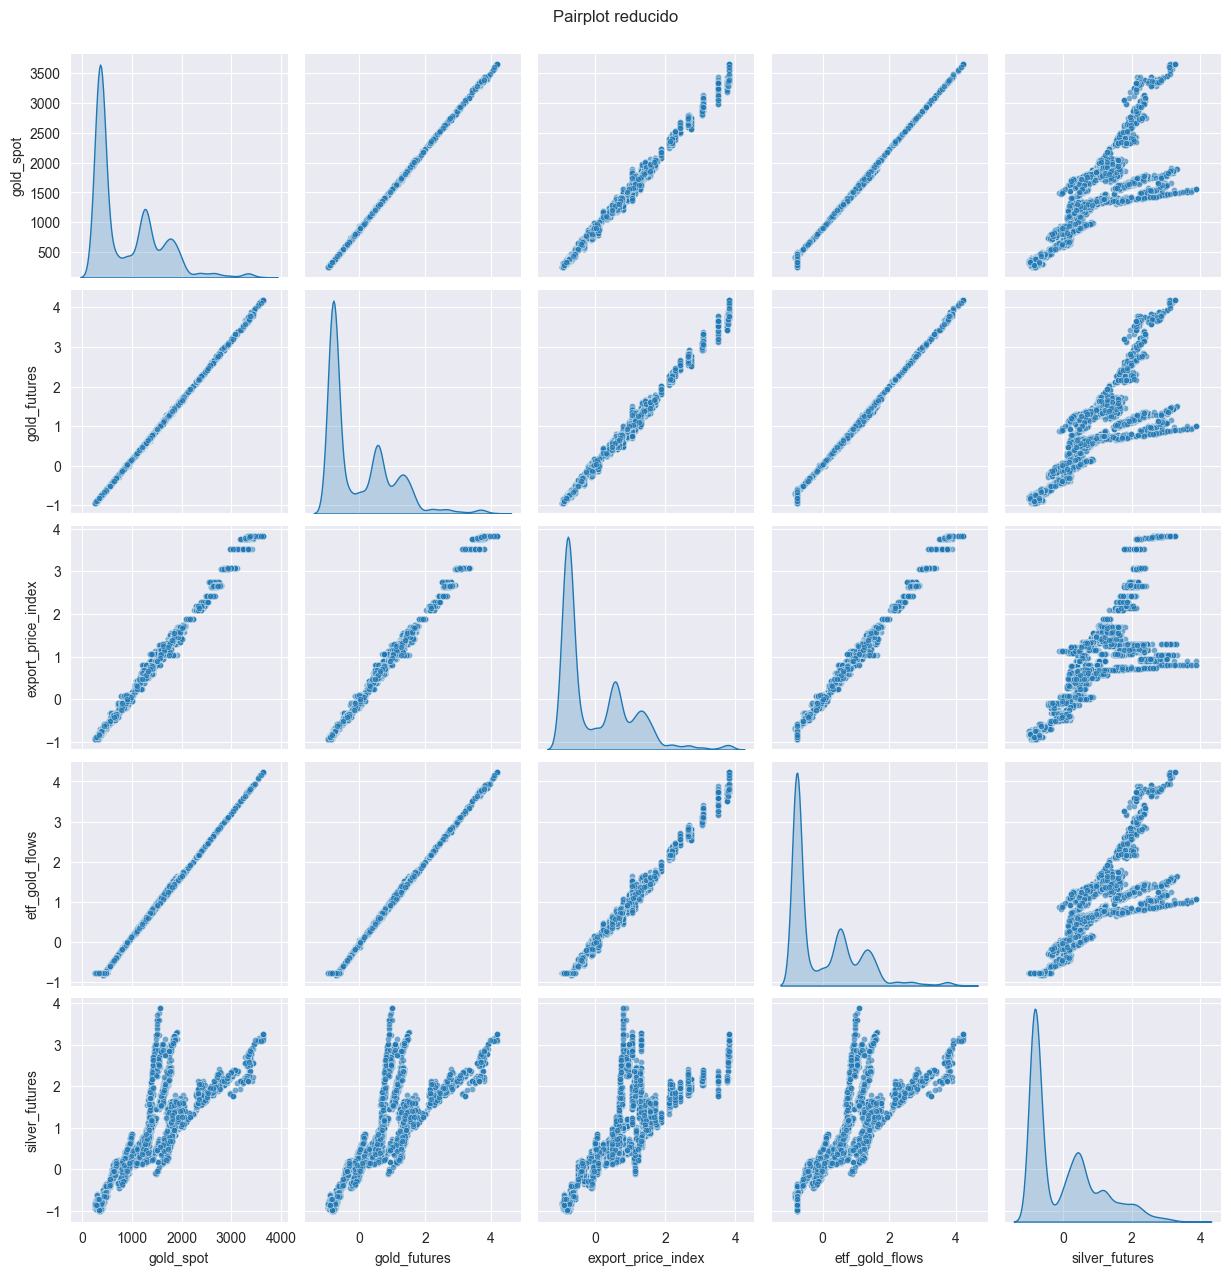

In [25]:
# 11.5 Pairplot reducido
# Elige manualmente o automáticamente (aquí auto: top 4 por abs_comb)
pair_feats = top_feats[:4]  # ajusta a 3-5
pair_df = df_exploratory[[TARGET] + pair_feats].dropna().sample(frac=1.0, random_state=1)  # mezcla

import seaborn as sns
sns.pairplot(pair_df, diag_kind="kde", plot_kws={"s":20, "alpha":0.6})
plt.suptitle("Pairplot reducido", y=1.02)
plt.savefig(os.path.join(OUTPUT_DIR, "pairplot_reduced.png"), dpi=200)
plt.show()


**Interpretación (ejemplo):**
- Buscar relaciones conjuntas (por ejemplo, interacción multiplicativa),
- evaluar si alguna pareja sugiere transformar o crear feature derivada (producto, ratio),
- detectar clusters o sub-poblaciones temporales (p. ej. pre/post 2008) si se colorea por periodo.


### 11.6 Heatmap compacto: correlación entre top 15 features

En lugar de visualizar la matriz completa 60×60, se muestra un heatmap
solo para las 15 features más relevantes con el target. Esto permite ver
redundancia y clusters en el subconjunto realmente importante.


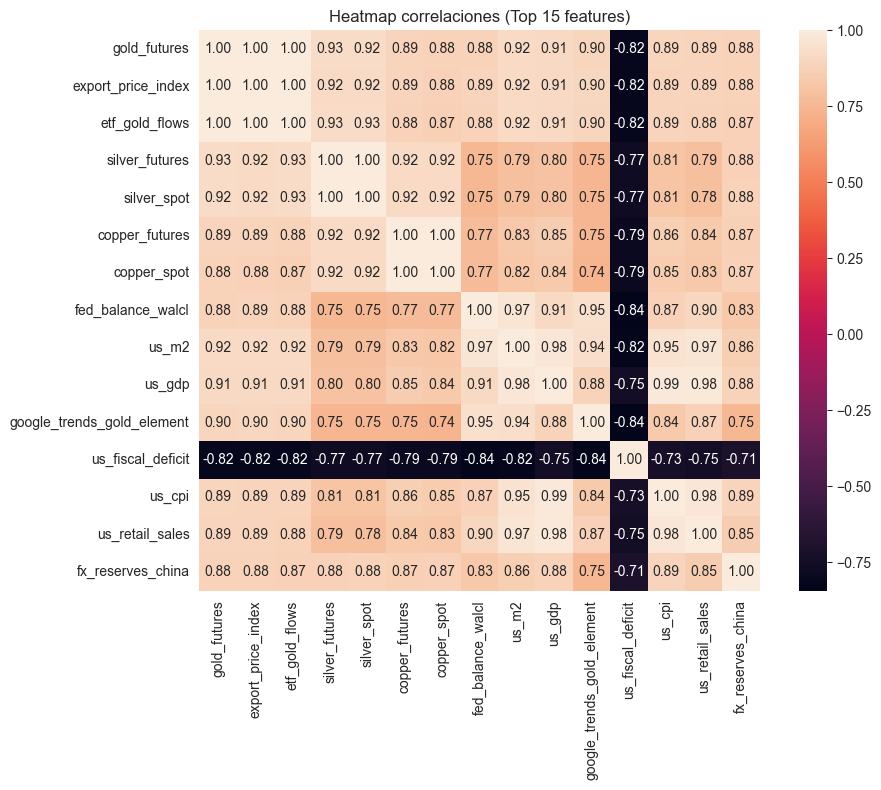

In [26]:
# 11.6 Heatmap compacto
TOP_HEAT = 15
top15 = top_df.sort_values("abs_comb", ascending=False).head(TOP_HEAT)["feature"].tolist()
corr_sub = X_scaled[top15].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_sub, annot=True, fmt=".2f", square=True, cbar=True)
plt.title("Heatmap correlaciones (Top 15 features)")
plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_DIR, "heatmap_top15.png"), dpi=200)
plt.show()


**Interpretación (ejemplo):**
- Celdas con correlación ≥ 0.9 indican redundancia casi total; agrupar o seleccionar representante.
- Las zonas con mezcla positiva/negativa revelarían factores con efecto contrario.
- Usar este heatmap junto con clusters (=agrupación automática) para decidir representantes.


In [27]:
# 11.7 Resumen CSV con métricas combinadas
mi_df = pd.read_csv(os.path.join(OUTPUT_DIR, "mutual_info_all_features.csv"), index_col=0, header=None) if os.path.exists(os.path.join(OUTPUT_DIR, "mutual_info_all_features.csv")) else mi_s
try:
    mi_series = mi_s
except NameError:
    mi_series = pd.Series(mi_df.values.flatten(), index=X_scaled.columns)

f_df = pd.read_csv(os.path.join(OUTPUT_DIR, "f_test_all_features.csv"), index_col=0) if os.path.exists(os.path.join(OUTPUT_DIR, "f_test_all_features.csv")) else f_s
try:
    f_series = f_s
except NameError:
    f_series = pd.Series(f_df["F"].values, index=f_df["feature"])

summary = pd.DataFrame({
    "feature": X_scaled.columns,
    "pearson_with_target": corr_with_target.set_index("feature")["pearson_with_target"],
    "spearman_with_target": corr_with_target.set_index("feature")["spearman_with_target"],
    "mutual_info": mi_series.reindex(X_scaled.columns).fillna(0).values,
    "f_stat": f_series.reindex(X_scaled.columns).fillna(0).values,
    "vif": pd.read_csv(os.path.join(OUTPUT_DIR, "vif_exploratorio.csv")).set_index("feature")["VIF"] if os.path.exists(os.path.join(OUTPUT_DIR, "vif_exploratorio.csv")) else np.nan
})

summary.to_csv(os.path.join(OUTPUT_DIR, "feature_summary_metrics.csv"), index=False)
summary.head(20)


,feature,pearson_with_target,spearman_with_target,mutual_info,f_stat,vif
feature,,,,,,
bitcoin_price,us10y_yield,0.751289,0.836126,2.314927,1.062825e+04,45.490380
brent_futures,policy_uncertainty,0.719813,0.762099,0.181969,2.604446e+03,1378.991953
brent_spot,geopolitical_risk,0.720840,0.764724,0.092858,2.874587e+01,985.250401
cftc_gold_positions,usdjpy_exchange,0.384737,0.332525,1.941695,2.715800e+02,3.469061
comex_inventories,silver_futures,-0.060086,-0.238827,2.683543,8.963062e+04,3.845906
comex_micro_gold,eurusd_exchange,0.764304,0.549130,1.795154,2.552757e+02,112.248230
commodities_bloomberg,gold_futures,-0.001823,0.120689,5.076330,2.015096e+08,214.659940
commodities_crb,us2y_yield,0.516363,0.569705,2.368940,6.285958e+03,415.391540
consumer_confidence,usdinr_exchange,-0.636850,-0.627346,2.968754,2.895738e+04,34.845703


### Cierre del EDA

Se han ejecutado las siguientes actividades:
- inspección de missingness y recorte temporal,
- generación del dataset exploratorio (ffill + bfill y escalado),
- PCA exploratorio y correlaciones (Pearson/Spearman),
- diagnóstico de multicolinealidad (VIF),
- clustering por correlación (definido),
- visualizaciones num-num: scatterplots, histogramas/KDE, MI, F-test, pairplot reducido y heatmap compacto.

Como producto final de esta etapa se ha generado:
- `dataset_imputado_escalado_simple.csv` (solo para EDA),
- `feature_stats.csv` (missingness),
- `feature_corr_with_target.csv`,
- `feature_corr_matrix_pearson.csv`,
- `feature_corr_matrix_spearman.csv`,
- `vif_exploratorio.csv`,
- `feature_summary_metrics.csv`,
- y las figuras guardadas en `stage1_outputs/`.

Con esta base se procede a:
1. consolidar el subconjunto candidato de features (clusters + representantes),
2. aplicar reducción final por VIF y validación económica,
3. diseñar pipelines de preprocesado anidados (imputación+escalado) para validación
   temporal y entrenamiento de modelos.
